# Bonus

## I. Core Functions + Graphics Functions
### We want to have utility functions that can help us transitioning between states and get rewards from an action.
### We also want to calculate the expected utility of an action given transition-reward dynamics.
### There are graphics functions that will help us print out tables later.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 'g' stands for green (+1)
# '0' stands for white (-0.04)
# 'b' stands for brown (-1)
# 'w' stands for walls (Wall)
# 's' stands for start (Start)

#get reward from symbol
def get_reward(position,map):
    symbol = map[position[0]][position[1]]
    if symbol=='g':    
            return 1
    elif symbol=='0':    
            return -0.04
    elif symbol=='b':    
            return -1
    else:
            return 0

#get possible action from position
def get_value(position,state_value):

    return state_value[position[0]][position[1]]

#get destination from position and action
def get_destination(position,action,map):

    if (position[0]+action[0] < 0) or (position[0]+action[0] > 5) or (position[1]+action[1] < 0) or (position[1]+action[1] > 11) or  map[position[0]+action[0]][position[1]+action[1]]=='w':
        new_position= position
    else:
        new_position = [position[0] + action[0], position[1] + action[1]]

    return new_position


def value_of_action(position,action,map):
    if action[0] == 0:
        action1 = [1 ,0]
        action2 = [-1,0]
    else:
        action1 = [0 , 1]
        action2 = [0 ,-1]

    straight_value = get_value(get_destination(position,action,map),state_value)*GAMMA + get_reward(get_destination(position,action,map),map)
    turn_value1 = get_value(get_destination(position,action1,map),state_value)*GAMMA + get_reward(get_destination(position,action1,map),map)
    turn_value2 = get_value(get_destination(position, action2, map),state_value)*GAMMA + get_reward(get_destination(position,action2,map),map)

    average_value = straight_value*0.8 + (turn_value1 + turn_value2)*0.1
    
    #Value of action Q(s,a) = Sigma[ p(r,s')* (V(s')*GAMMA + r(s,a) ]
    
    return average_value

def display_2d_list_with_highlight(matrix, highlight_index):
    cmap = plt.cm.get_cmap("viridis").copy()
    cmap.set_bad(color='grey')  # Set color for highlighted element

    highlighted_matrix = np.array(matrix, dtype=float)
    
    for highlighted_index in highlight_index:
        highlighted_matrix[highlighted_index[0], highlighted_index[1]] = np.nan
        
    plt.imshow(highlighted_matrix, cmap=cmap, interpolation='nearest', vmin=np.nanmin(matrix), vmax=np.nanmax(matrix))
    plt.title("Utility Map through Iterations")
    plt.colorbar()
    plt.show()


def get_wall_list(map):
    wall_list=[]
    for row in range(6):
        for column in range(12):
            if map[row][column] == 'w':
                wall_list.append([row,column])
    return wall_list

def print_state_utility(state_value,wall_list):
    for row in range(6):
        for column in range(12):
            if [row,column] in wall_list:
                print('Wall',end = '\t')
            else:
                print(state_value[row][column], end="\t")  
        print()  

def print_policy(policy_table,wall_list):
    for row in range(6):
        for column in range(12):
            element = policy_table[row][column]
    
            if [row,column] in wall_list:
                print('Wall',end = '\t')
                continue
            elif element == [0,-1]:
                action = 'Left'
            elif element == [0,1]:
                action = 'Right'
            elif element == [-1, 0 ]:
                action = 'Up'
            else:
                action = 'Down'
            print(action,end="\t")  
        print()          
        
#########################################


## II. Problem-specific data
### Here we input our map layout, as well as initializing utility table and policy table.
### We also get our discount factor and accuracy threshold variable for later iterations.

In [2]:
# (row,column) format

map= [
    ['g','w','g','0','0','w','g','0','b','0','w','g'],
    ['0','b','0','g','w','w','0','w','w','g','w','b'],
    ['w','0','w','0','g','0','b','g','w','0','w','b'],
    ['0','0','s','b','0','g','0','b','w','b','w','b'],
    ['b','w','w','w','b','w','g','w','0','0','0','b'],
    ['b','g','g','w','0','w','0','w','0','g','0','0'],
    ]

#initialize_state_value table
state_value = [[0]*12 for i in range(6)]

#initialize policy table
policy_table = [[[0,1] for k in range(12)] for j in range(6)]

#accuracy threshold variable
THETA = 0.01

#Discount factor
GAMMA = 0.99

#Possible Action
action = [
    [0,1], [0,-1], [1,0], [-1,0]
]


## IV. Value Iteration:


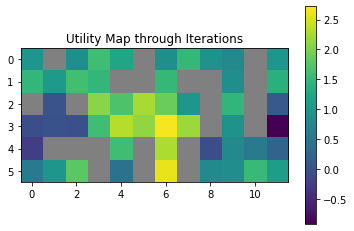

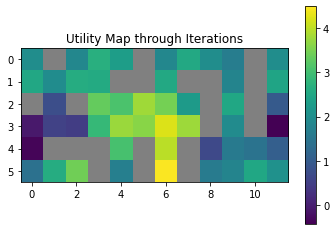

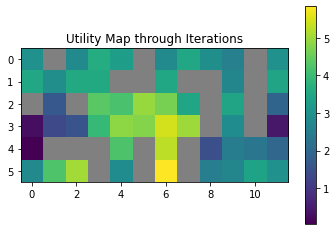

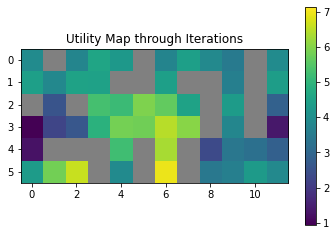

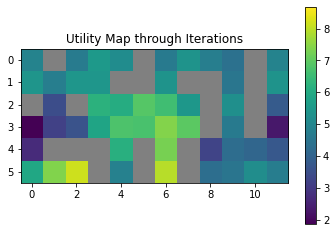

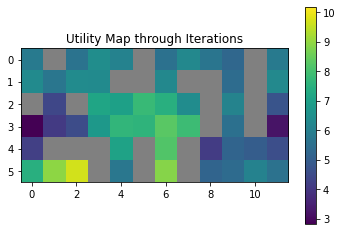

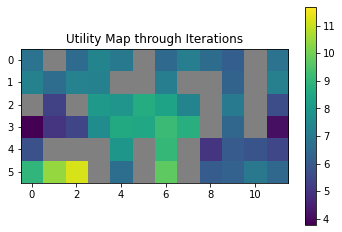

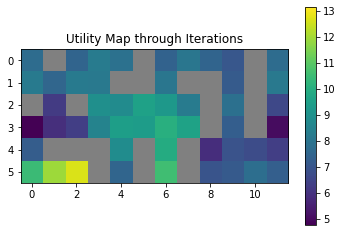

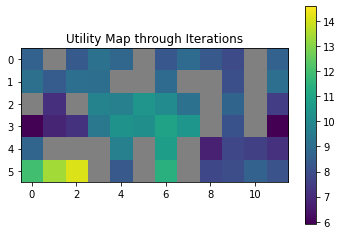

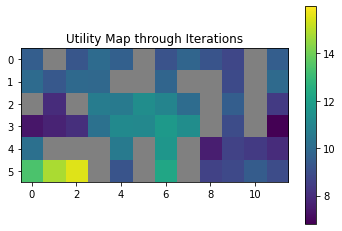

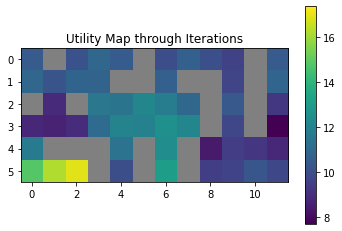

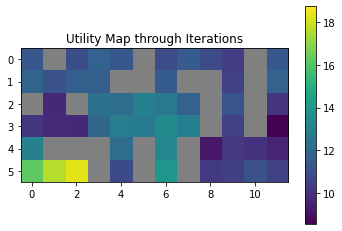

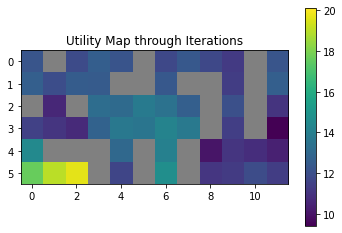

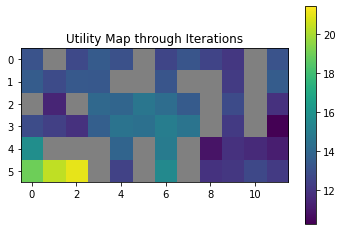

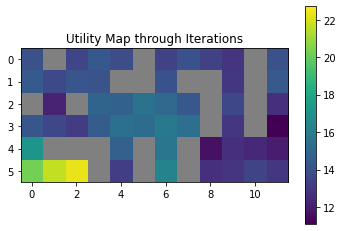

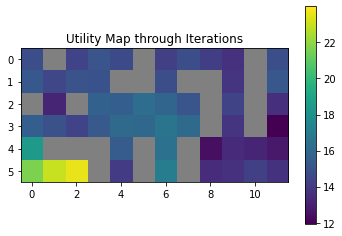

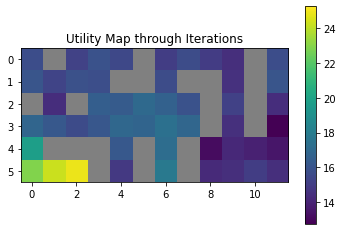

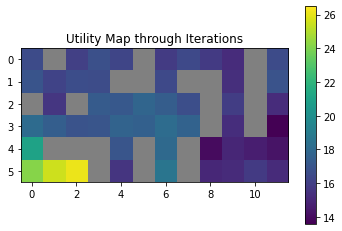

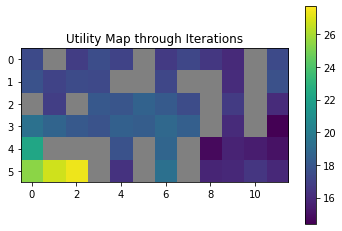

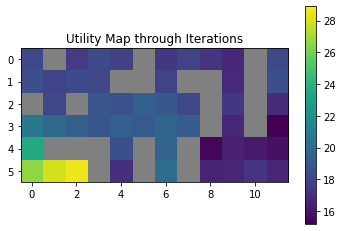

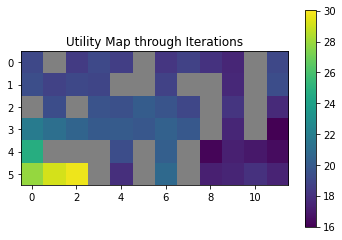

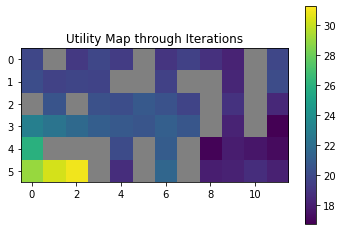

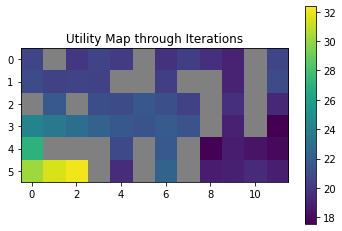

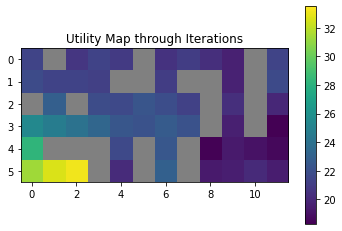

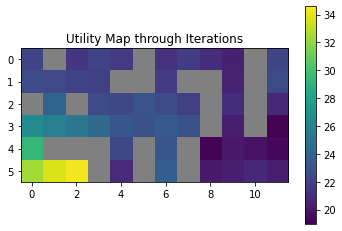

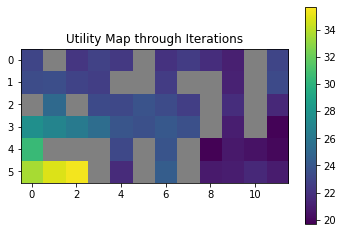

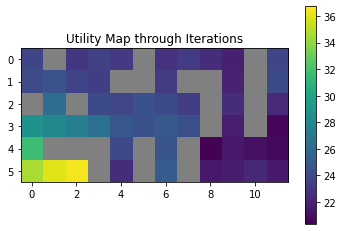

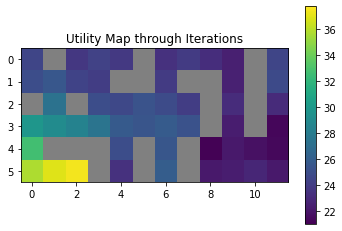

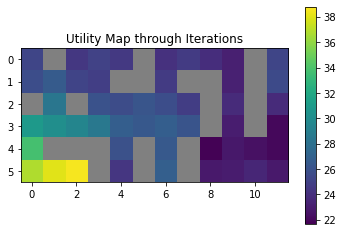

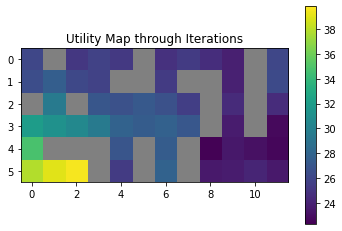

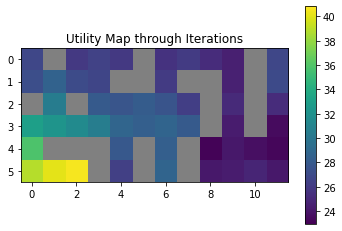

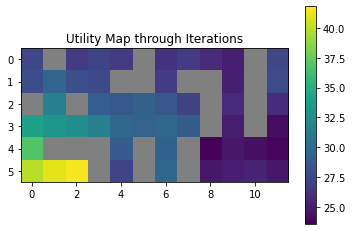

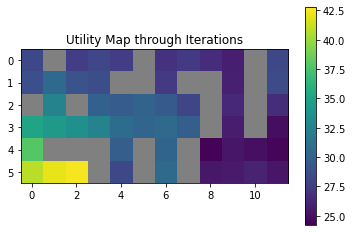

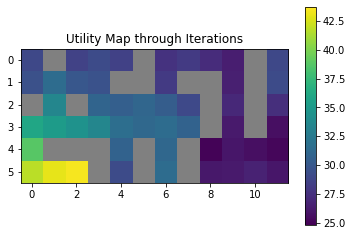

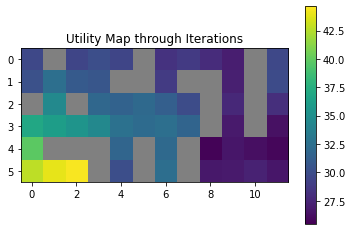

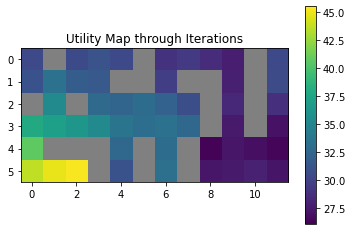

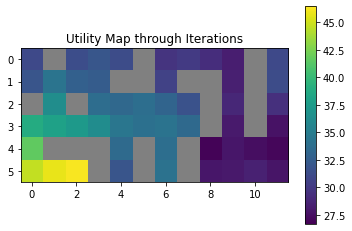

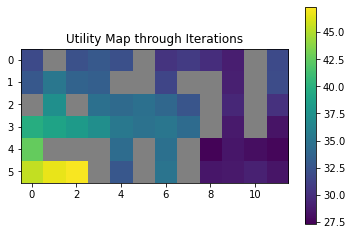

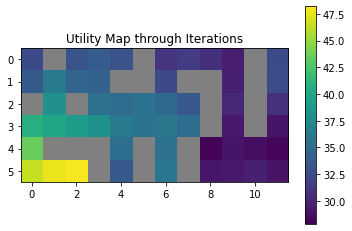

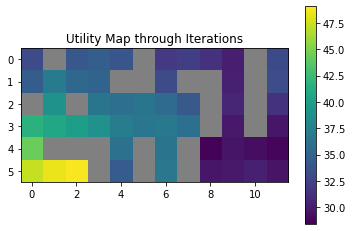

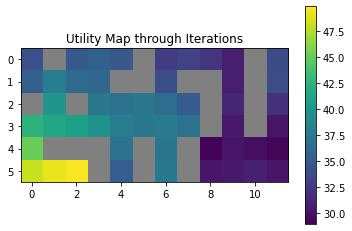

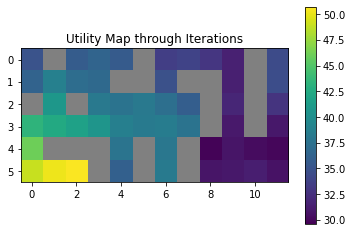

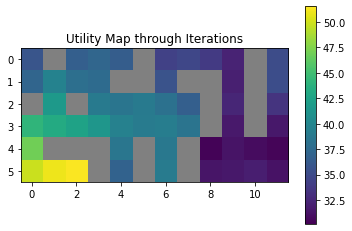

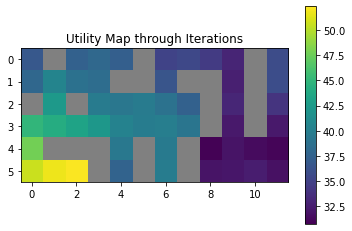

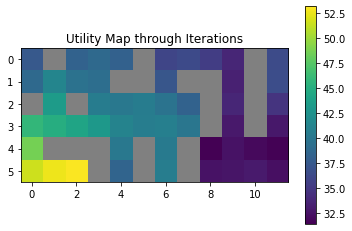

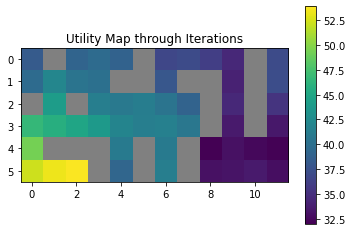

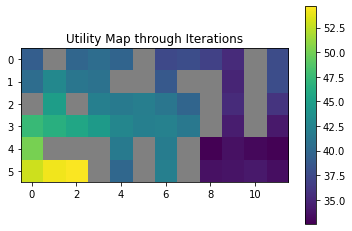

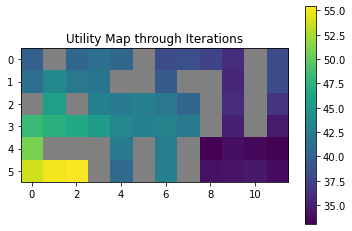

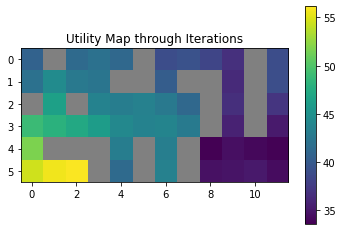

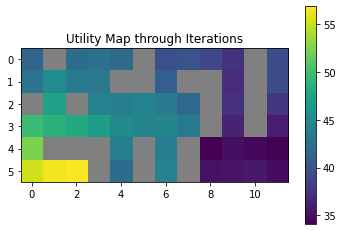

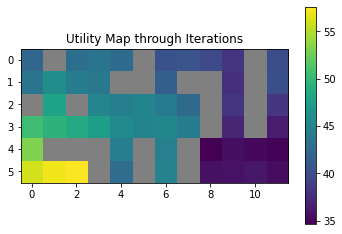

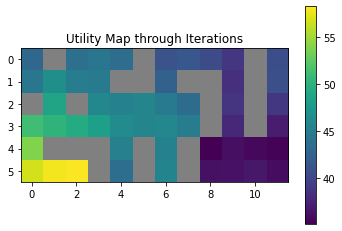

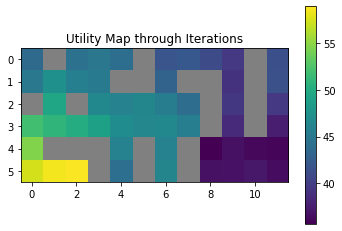

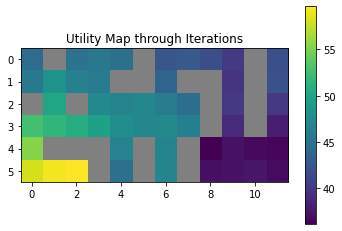

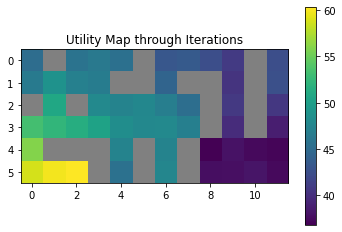

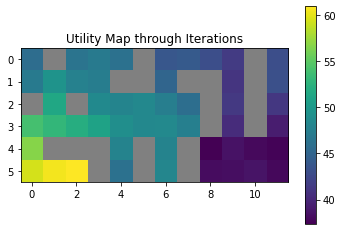

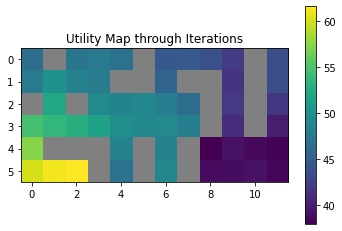

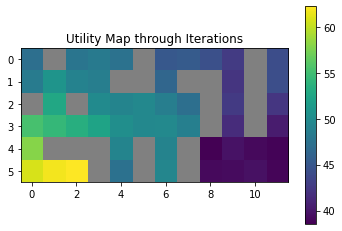

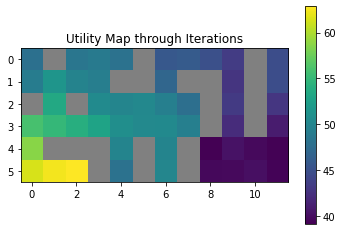

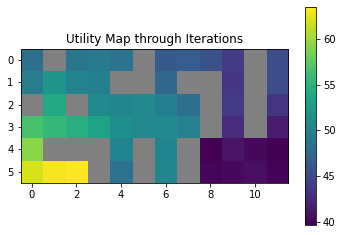

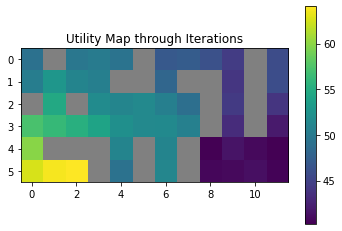

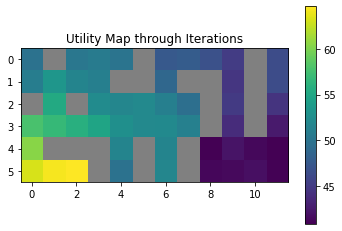

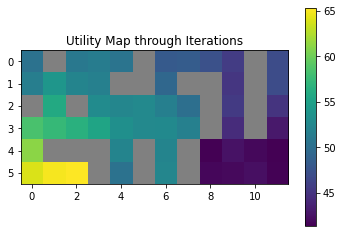

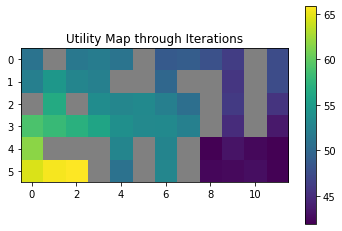

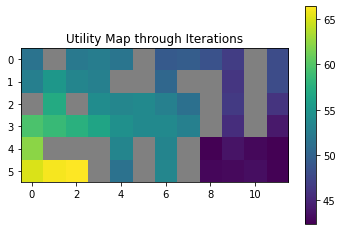

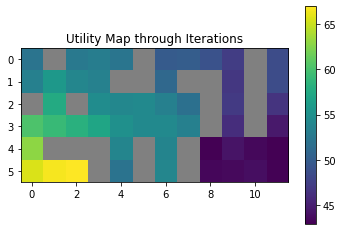

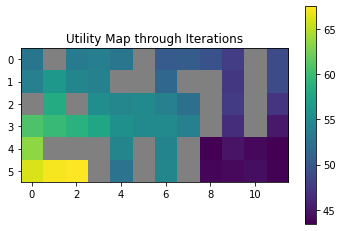

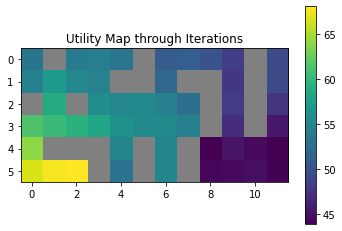

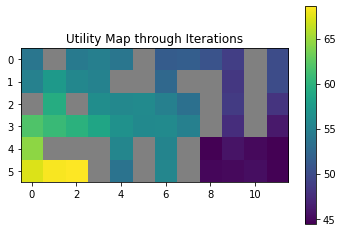

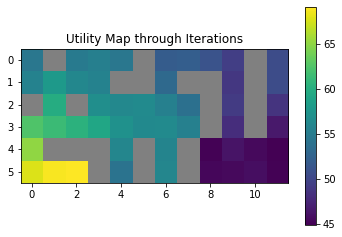

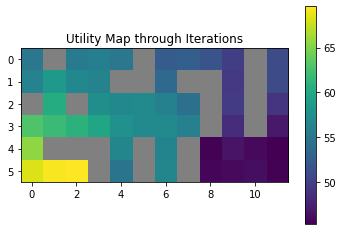

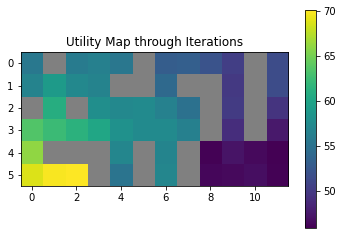

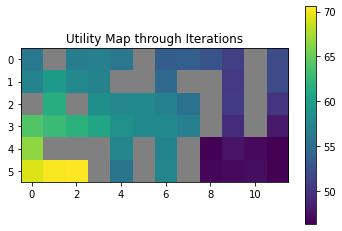

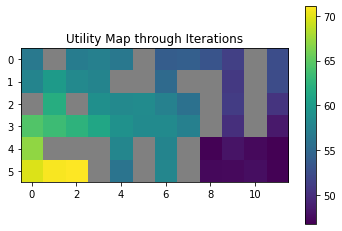

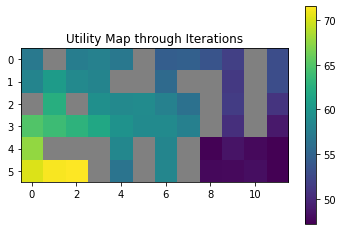

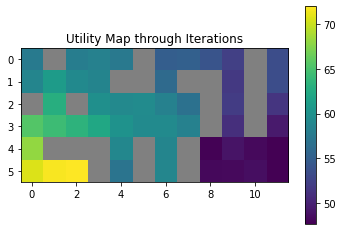

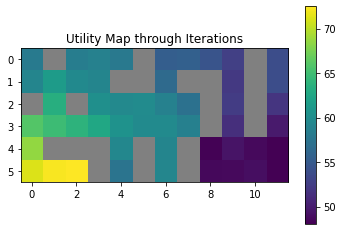

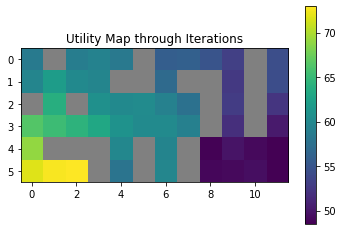

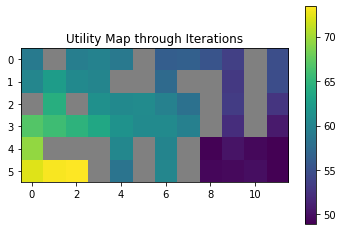

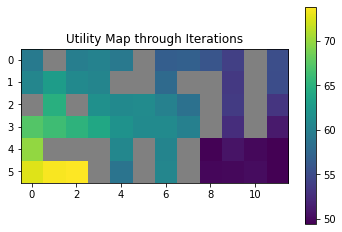

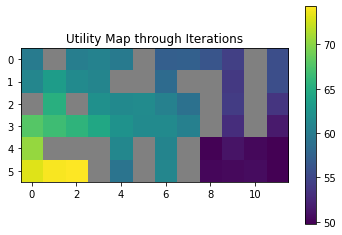

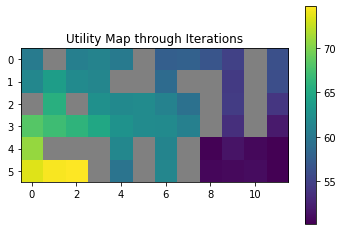

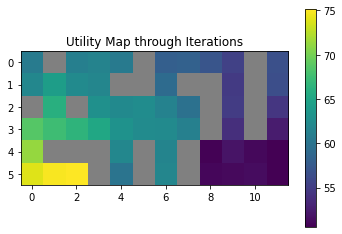

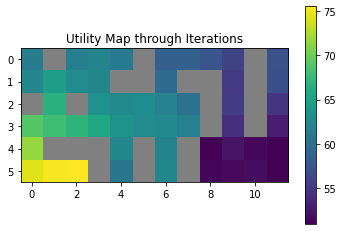

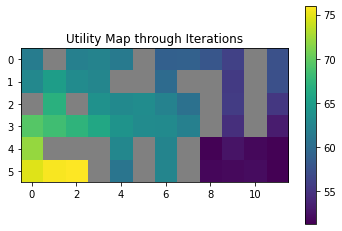

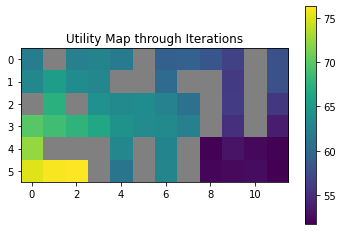

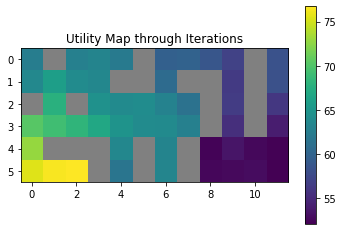

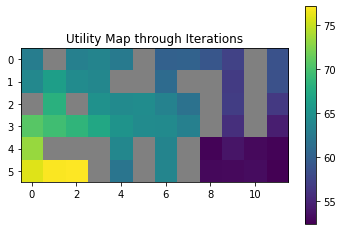

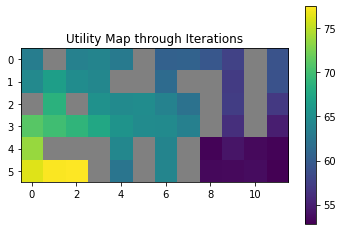

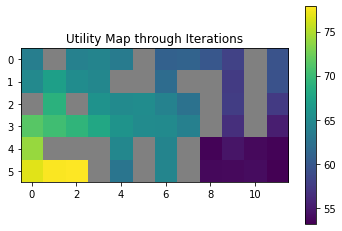

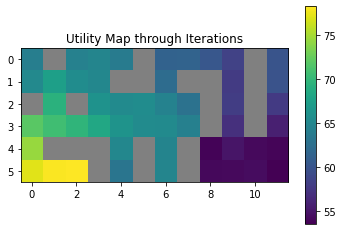

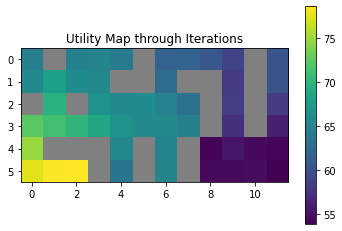

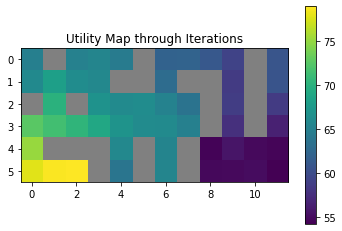

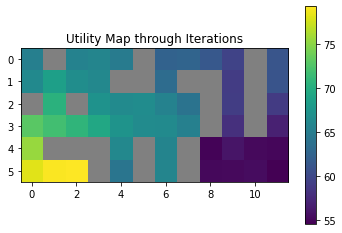

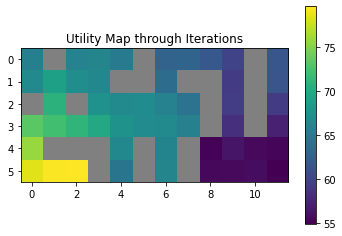

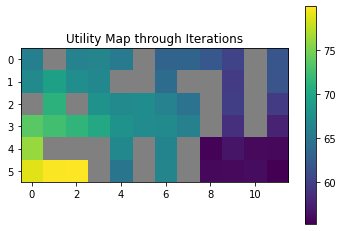

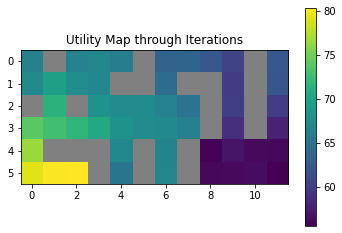

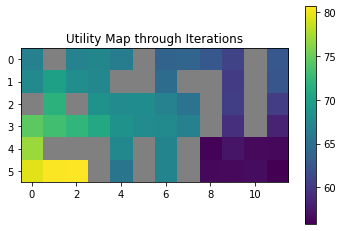

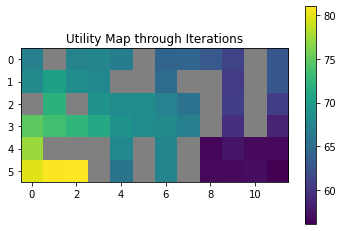

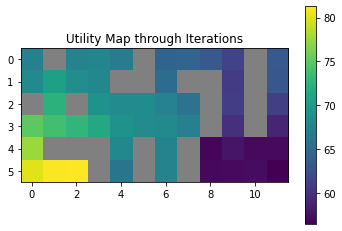

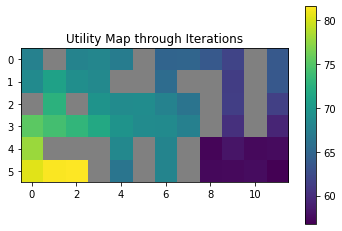

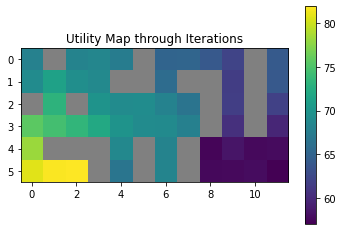

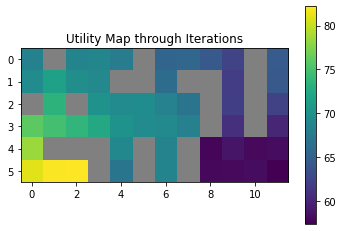

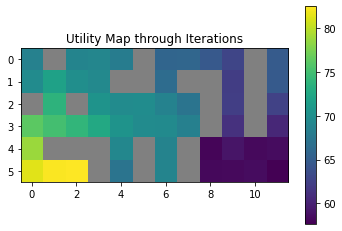

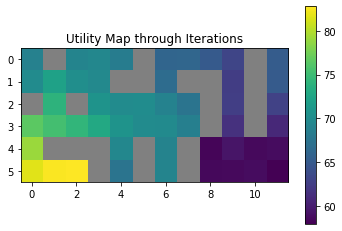

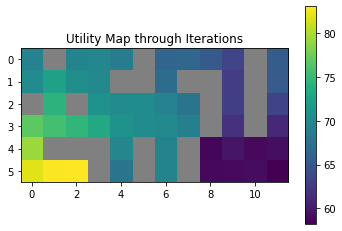

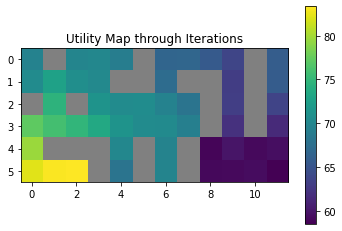

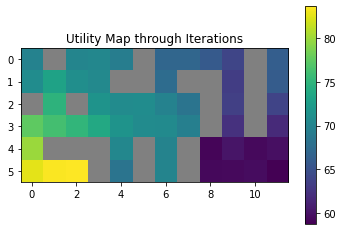

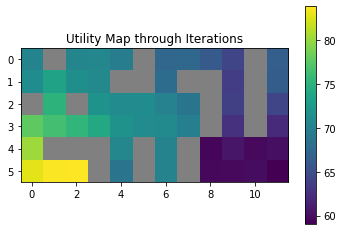

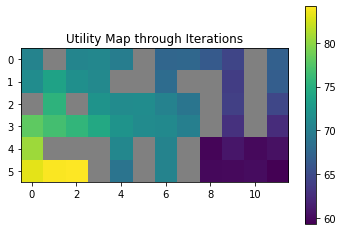

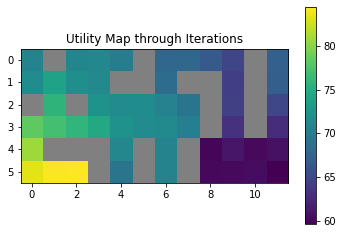

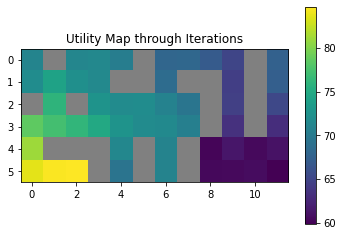

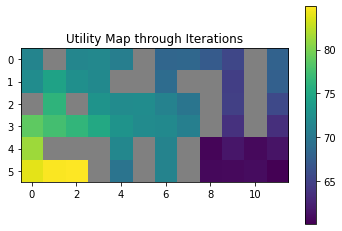

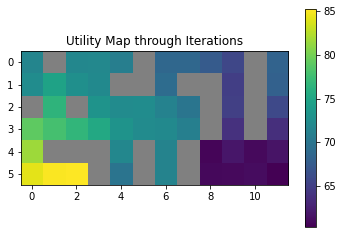

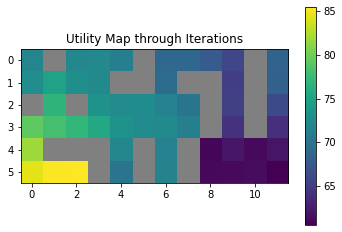

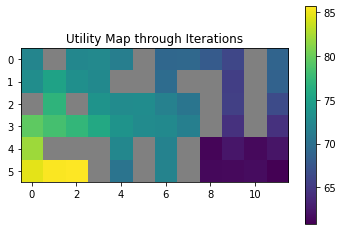

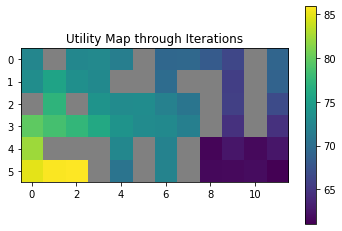

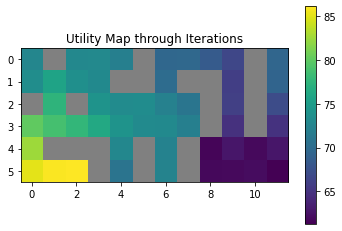

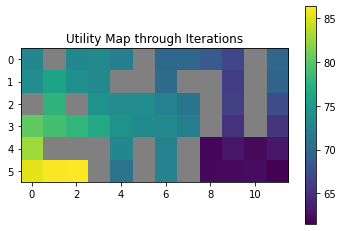

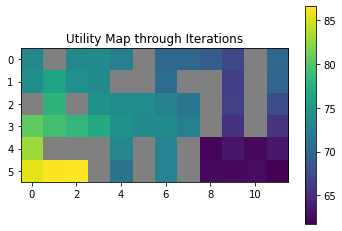

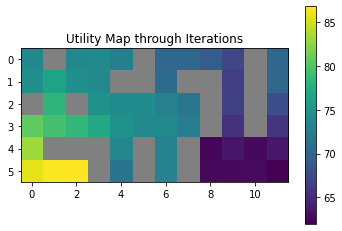

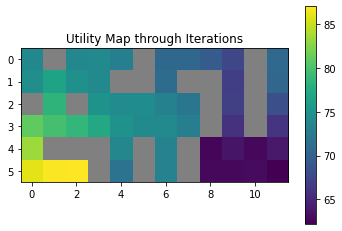

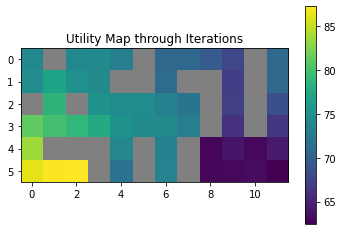

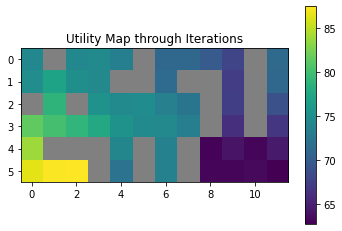

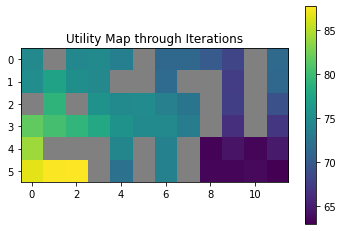

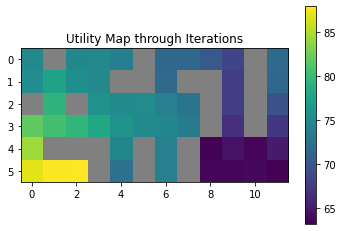

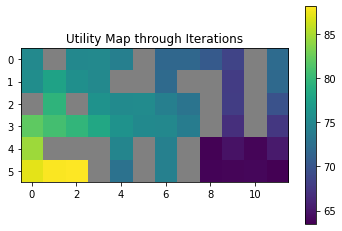

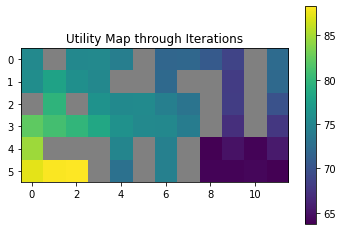

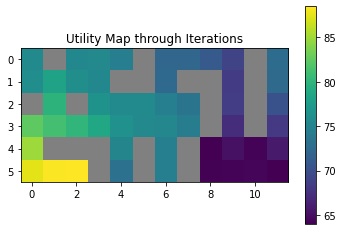

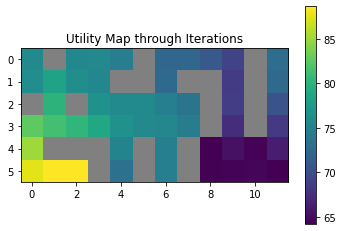

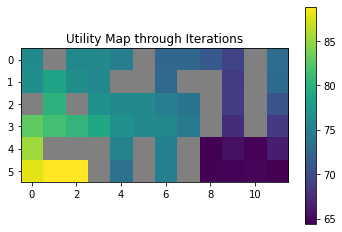

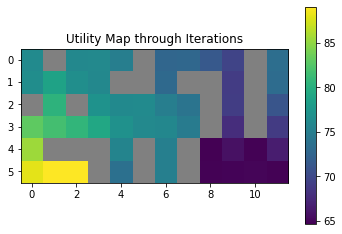

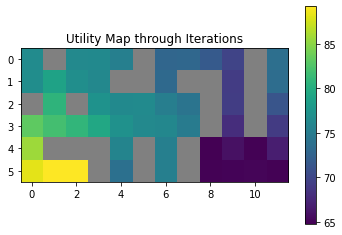

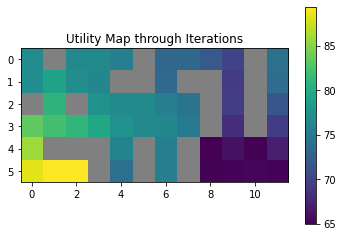

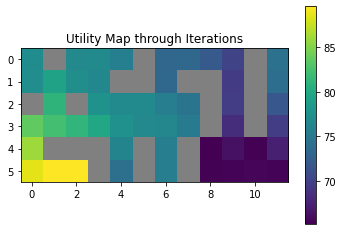

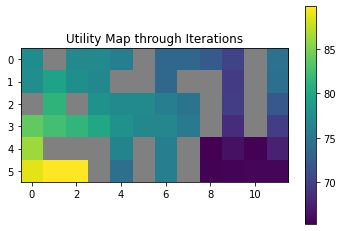

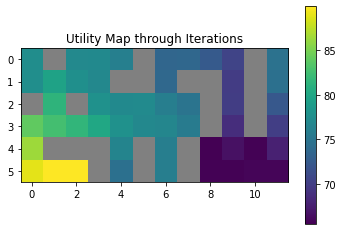

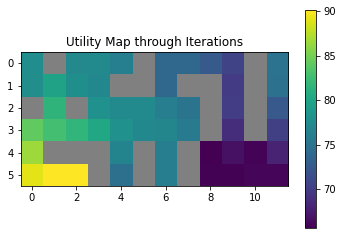

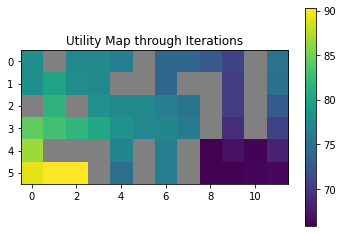

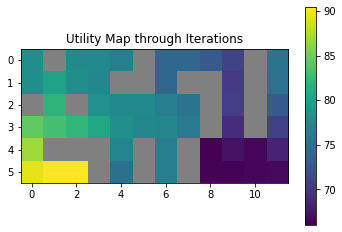

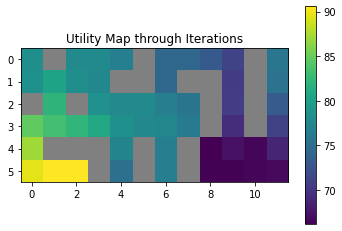

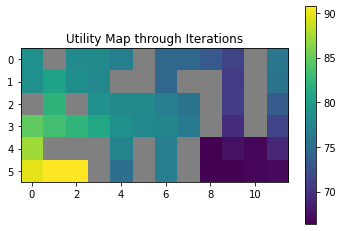

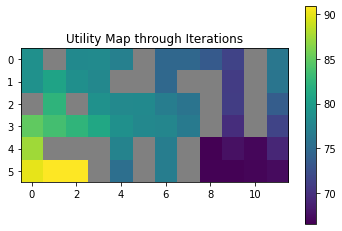

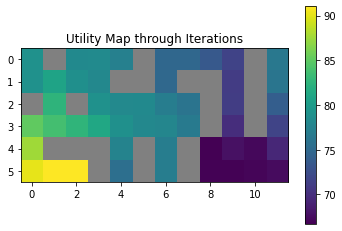

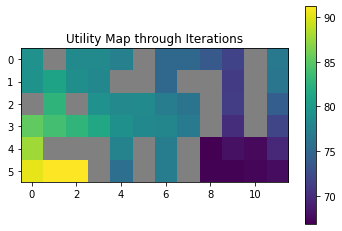

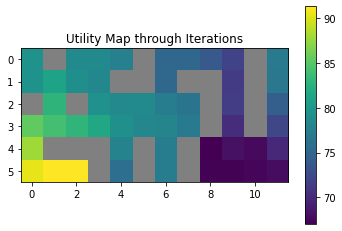

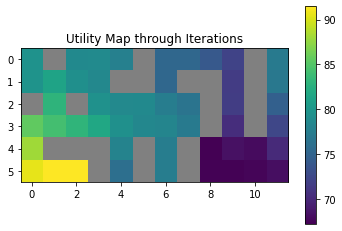

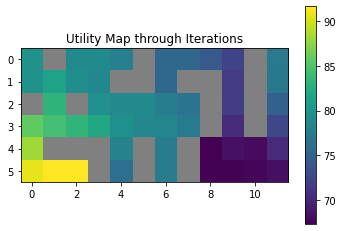

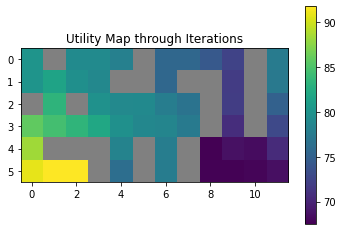

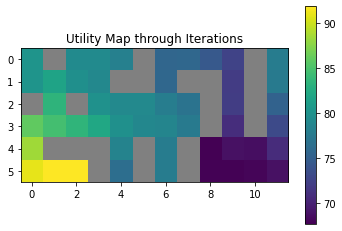

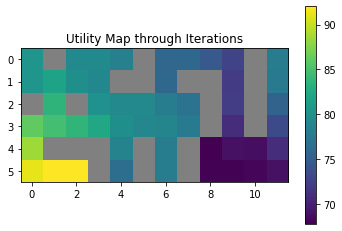

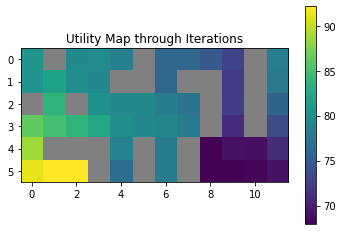

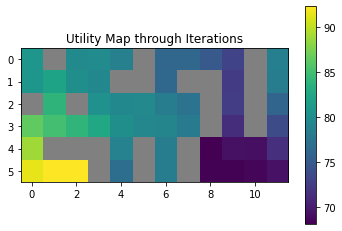

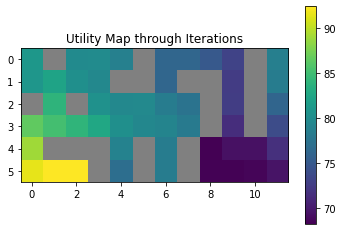

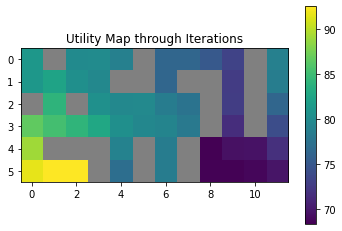

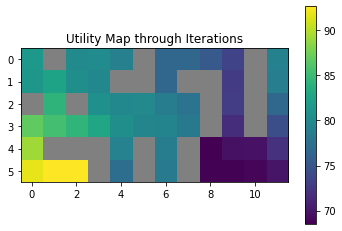

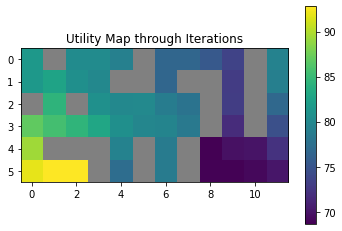

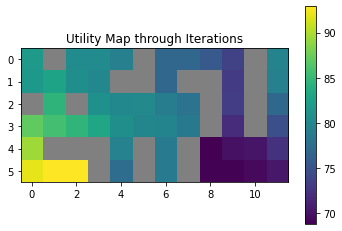

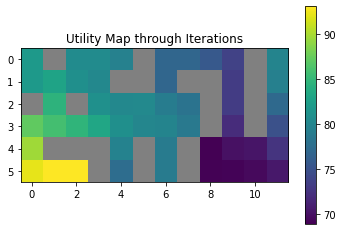

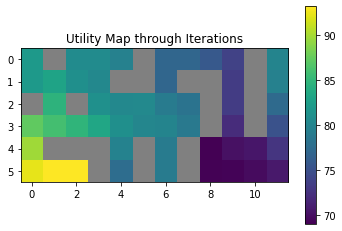

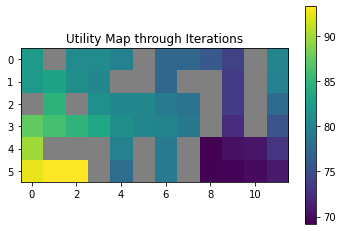

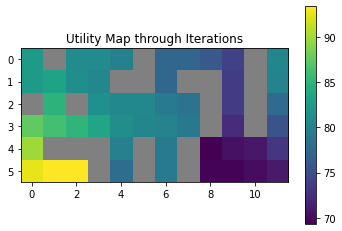

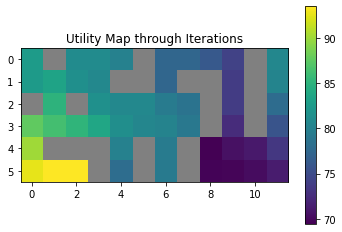

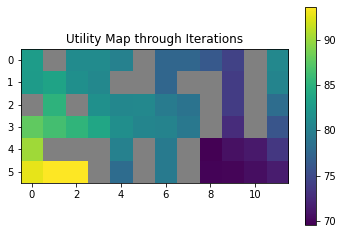

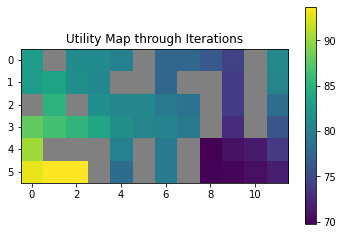

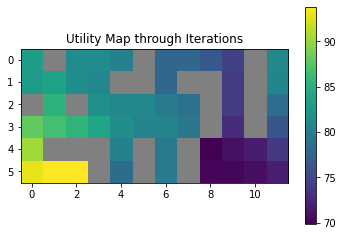

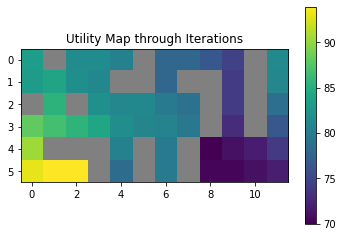

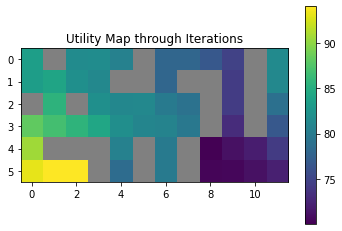

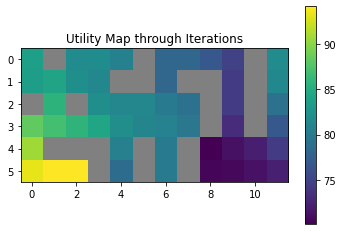

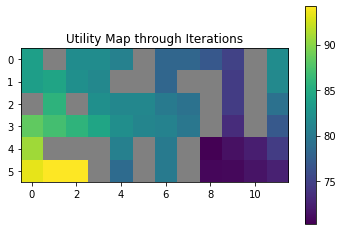

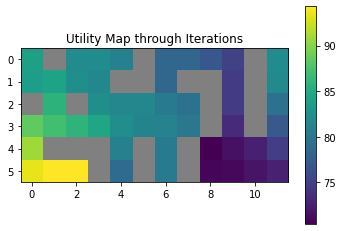

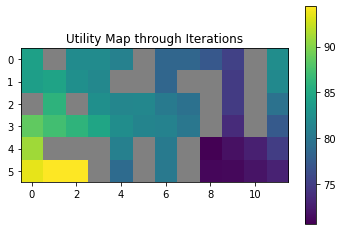

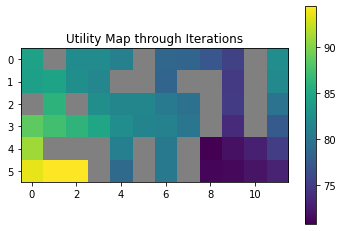

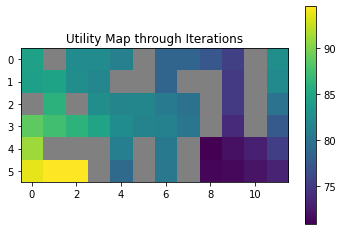

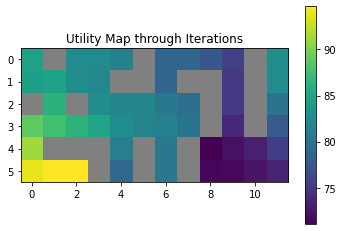

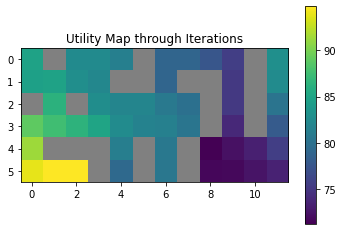

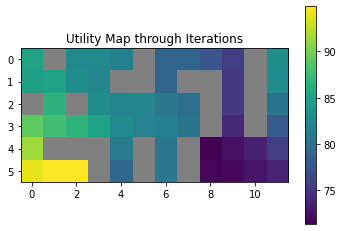

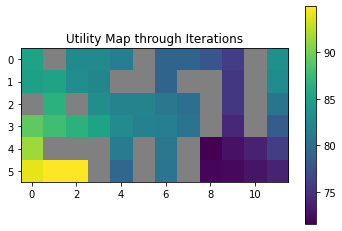

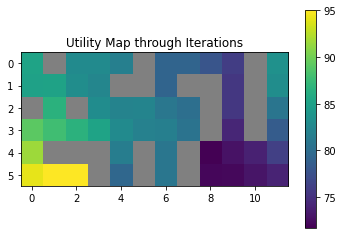

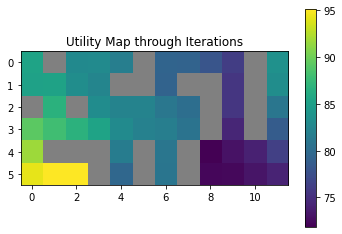

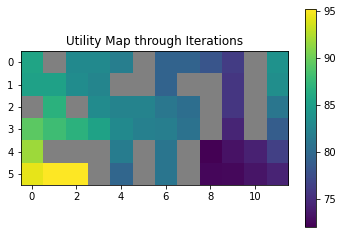

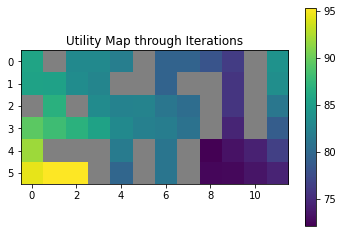

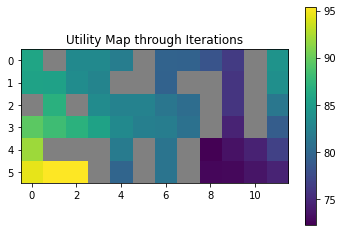

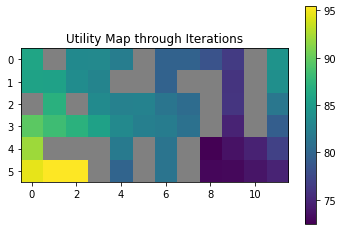

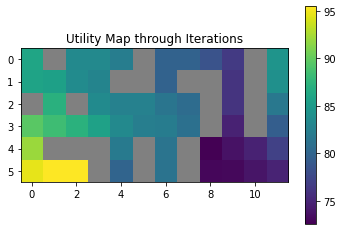

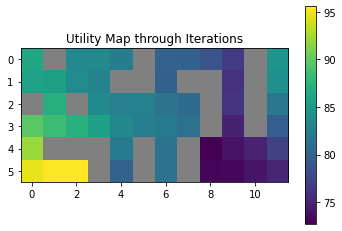

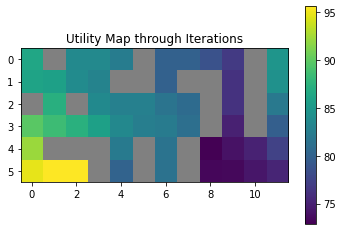

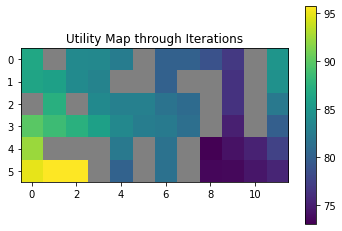

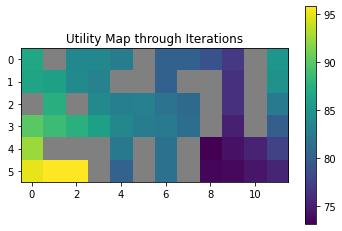

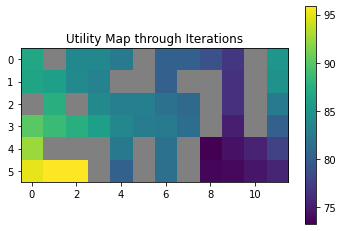

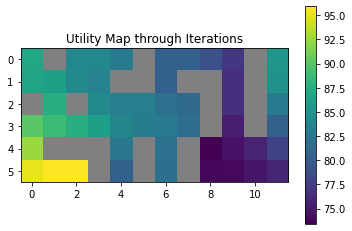

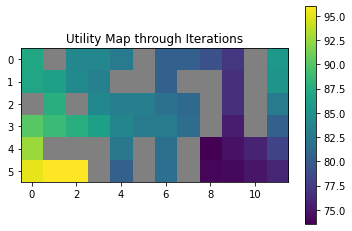

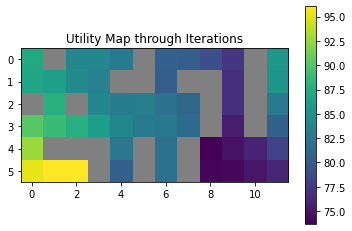

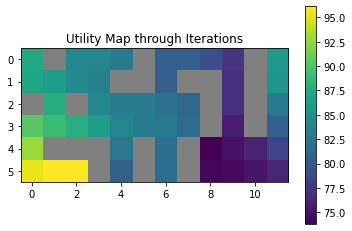

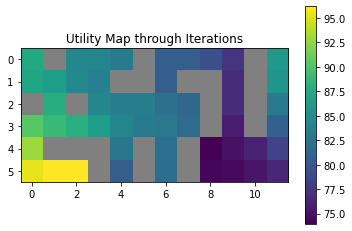

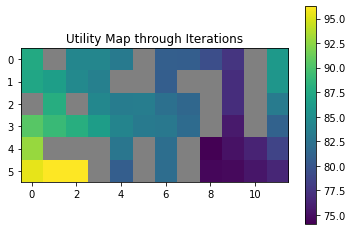

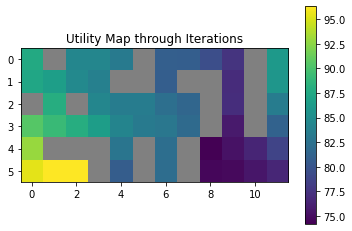

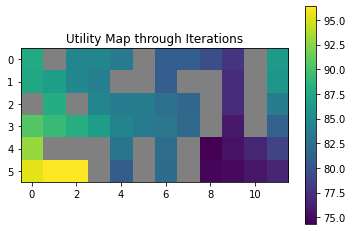

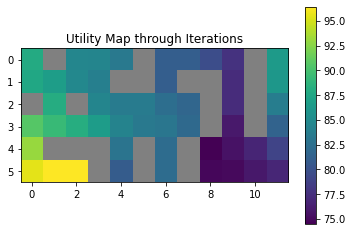

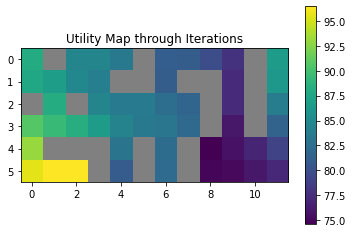

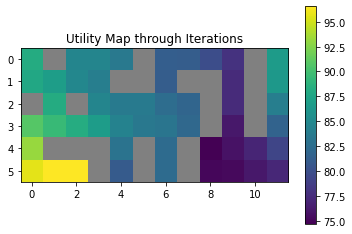

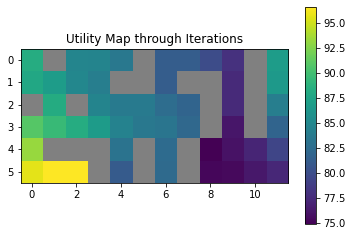

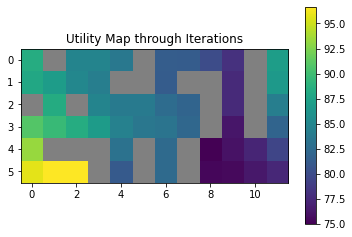

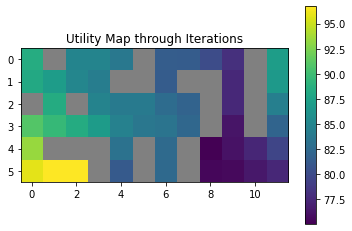

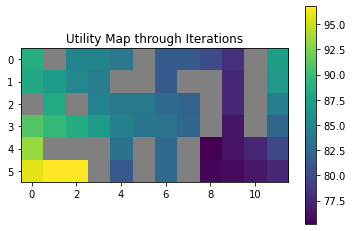

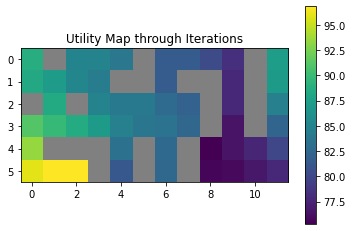

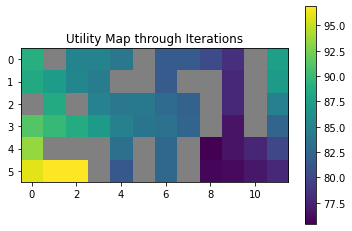

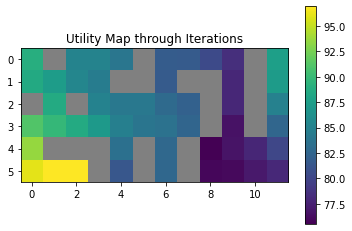

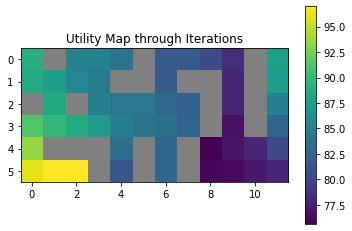

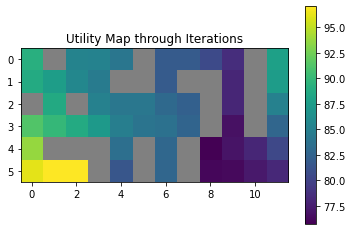

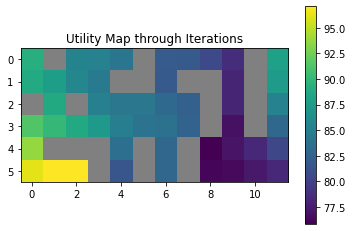

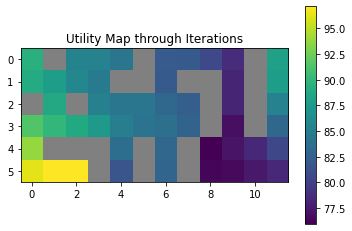

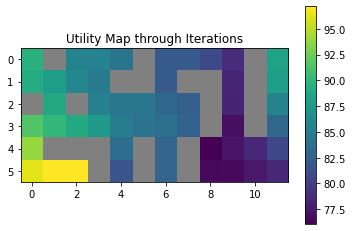

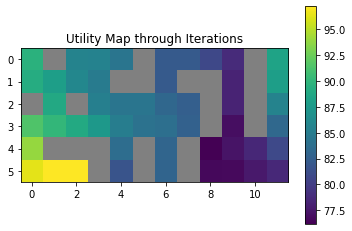

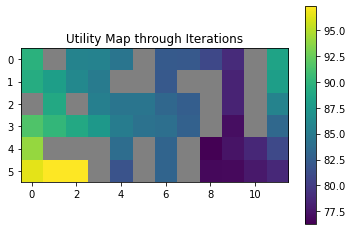

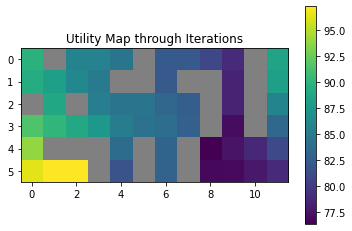

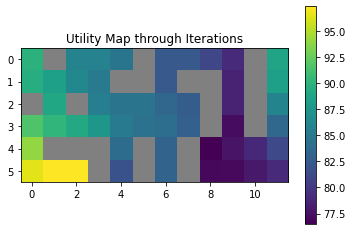

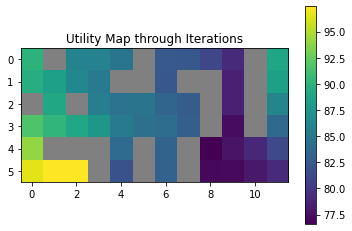

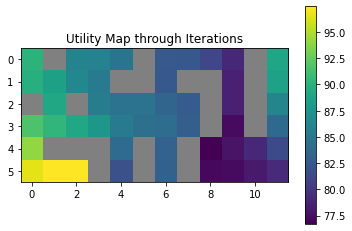

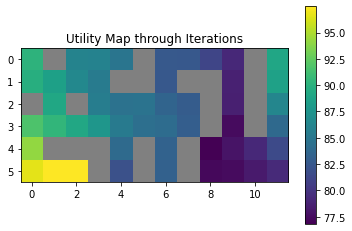

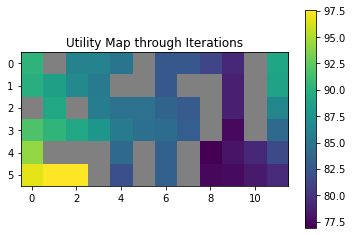

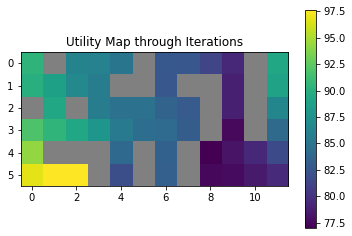

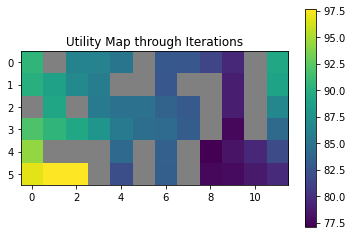

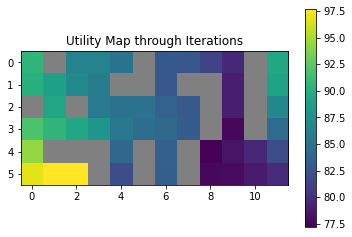

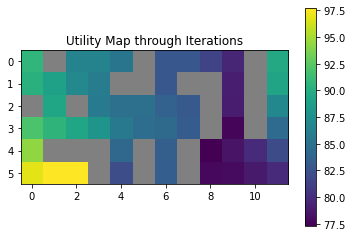

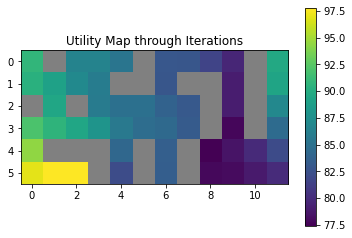

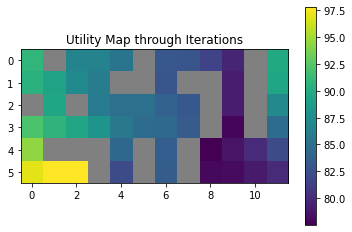

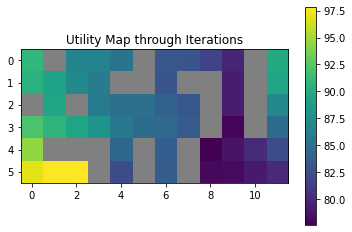

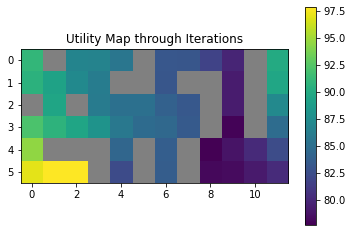

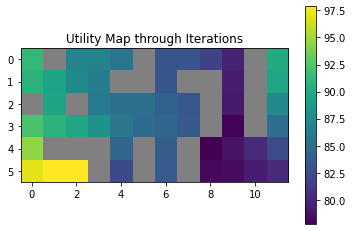

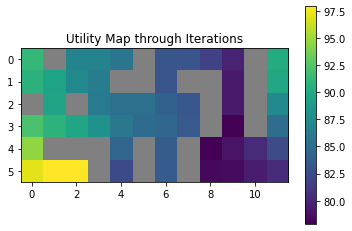

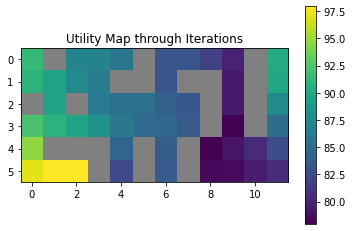

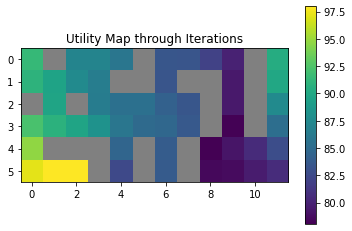

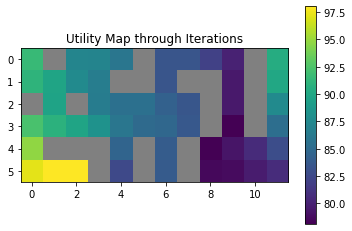

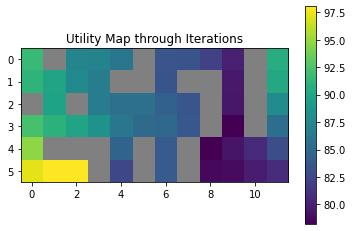

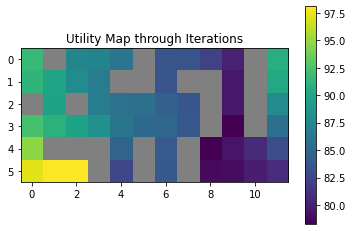

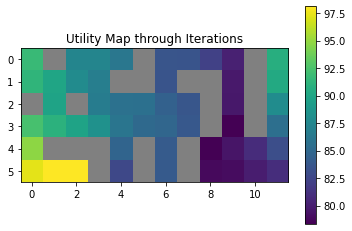

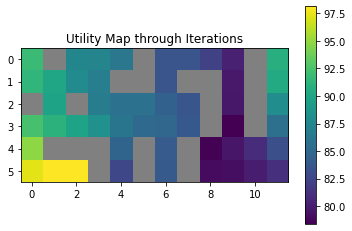

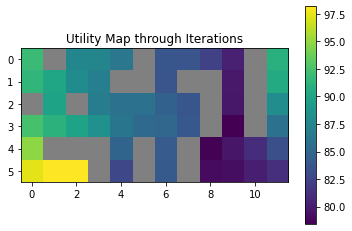

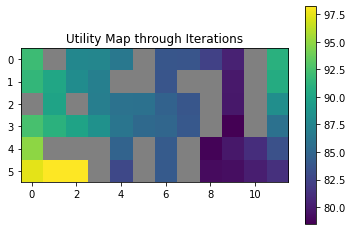

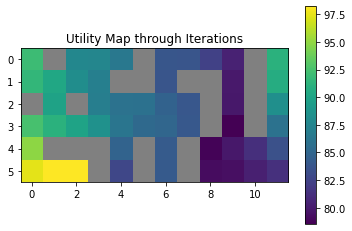

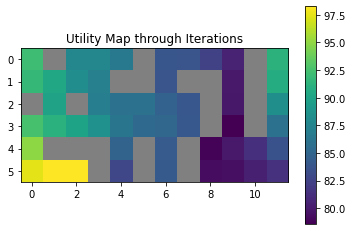

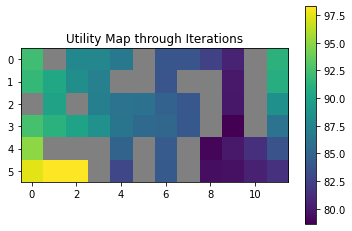

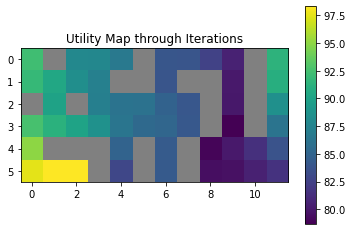

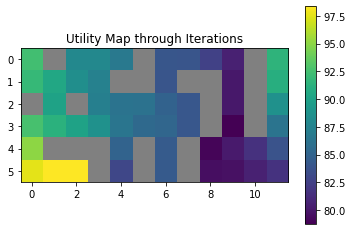

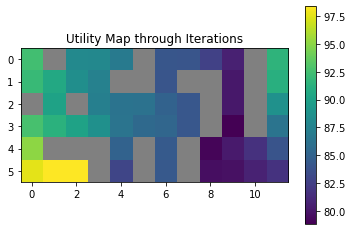

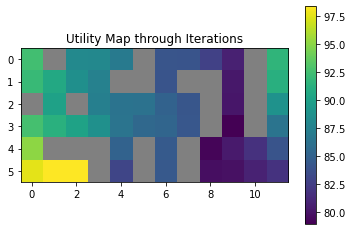

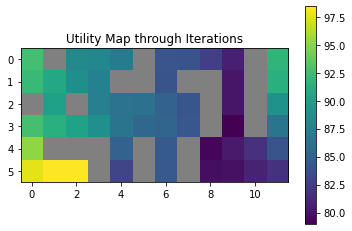

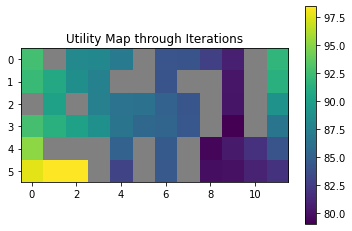

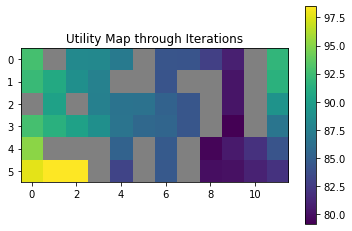

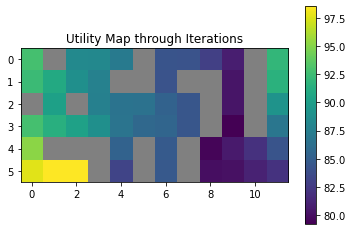

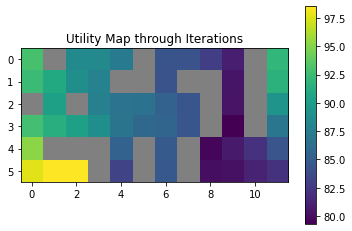

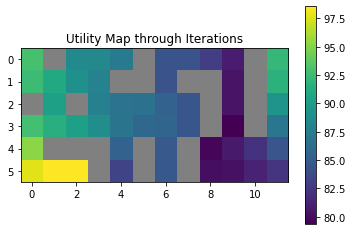

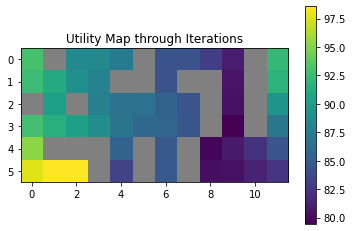

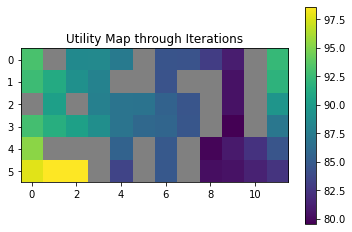

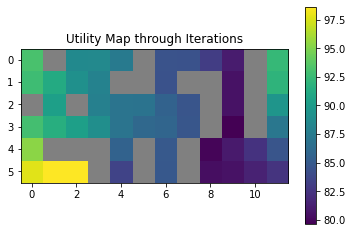

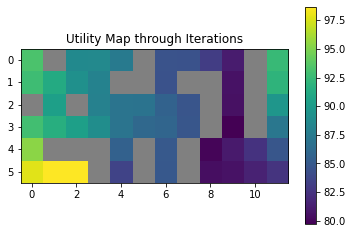

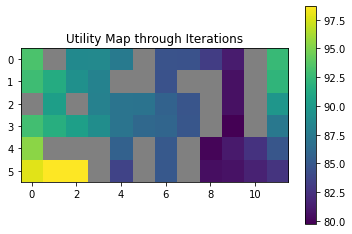

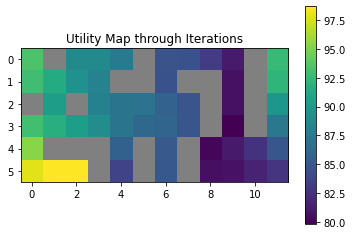

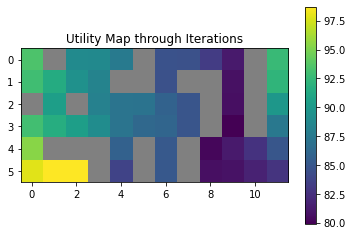

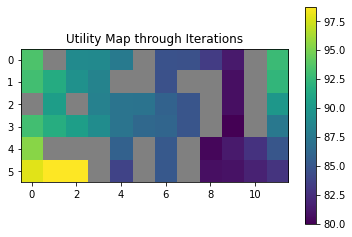

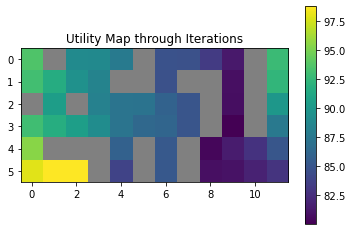

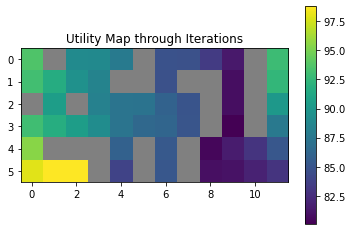

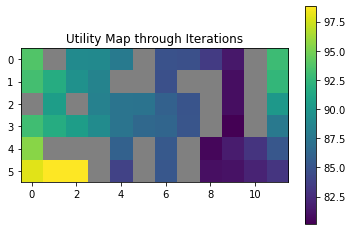

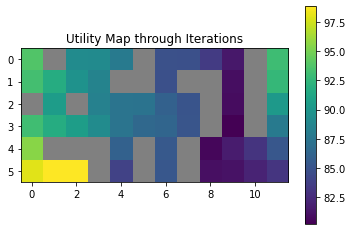

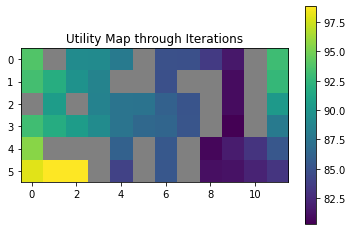

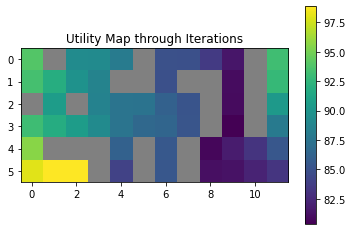

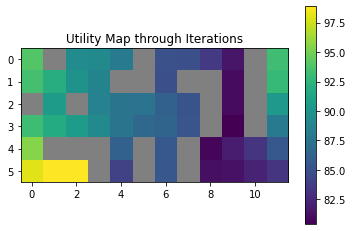

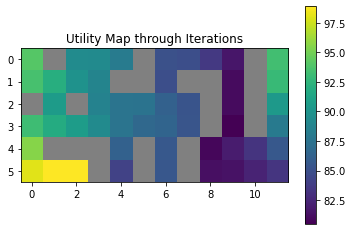

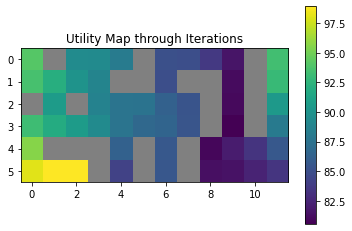

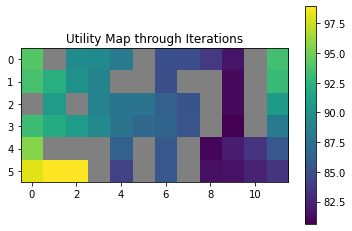

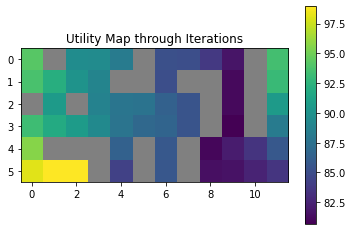

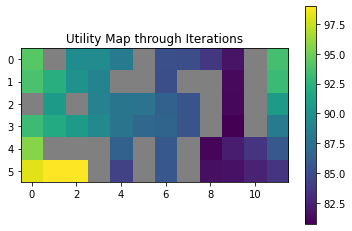

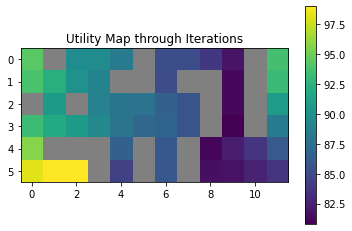

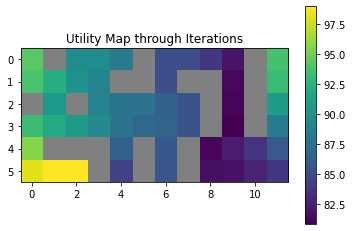

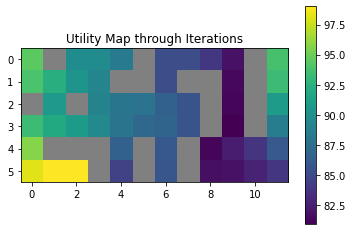

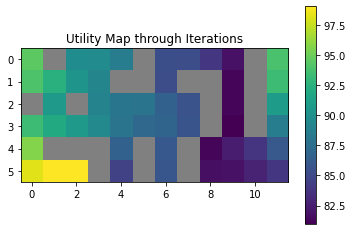

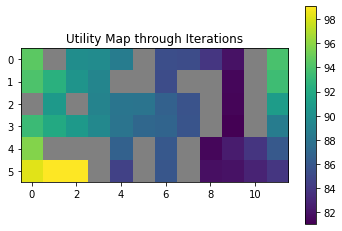

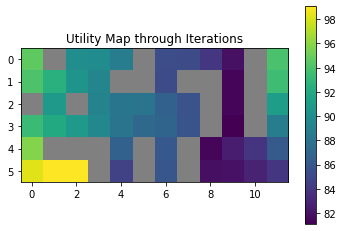

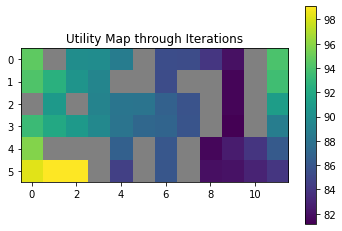

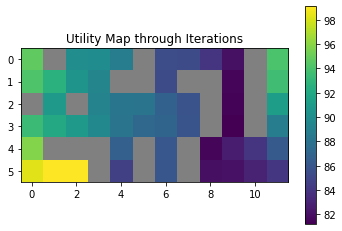

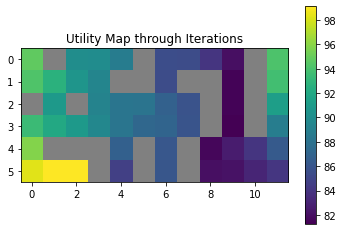

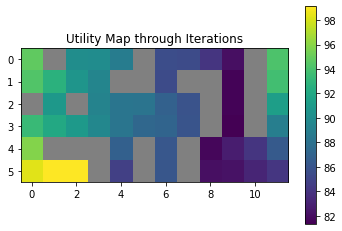

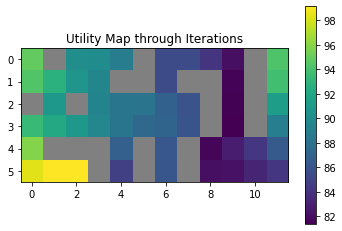

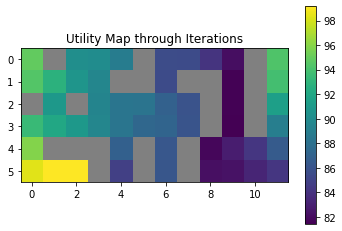

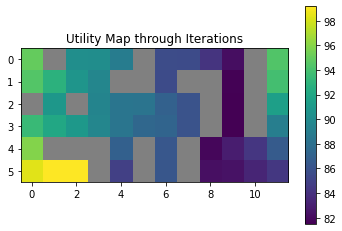

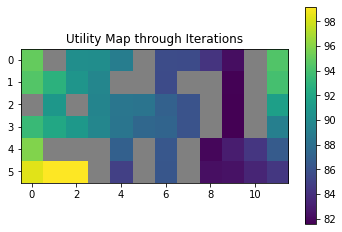

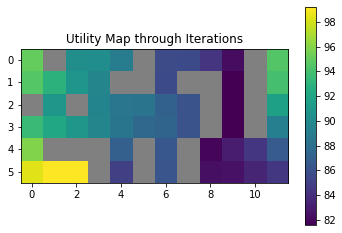

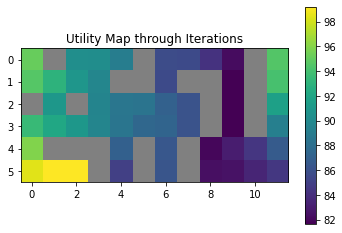

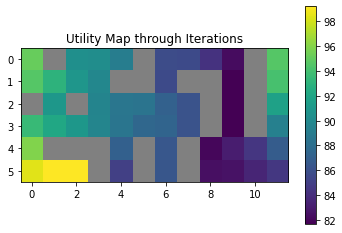

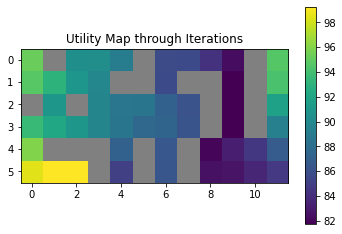

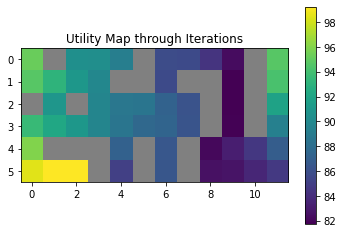

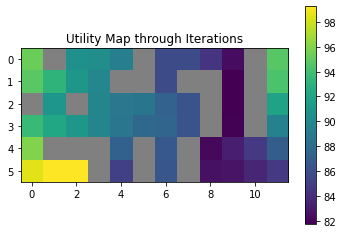

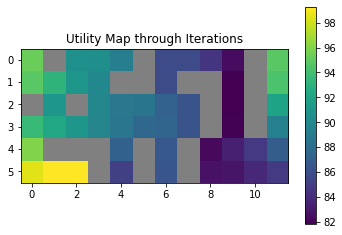

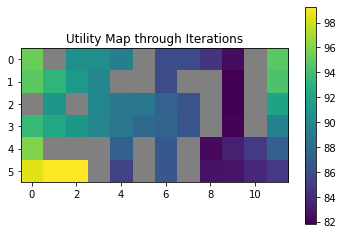

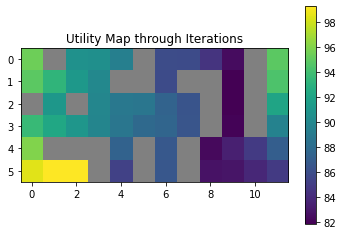

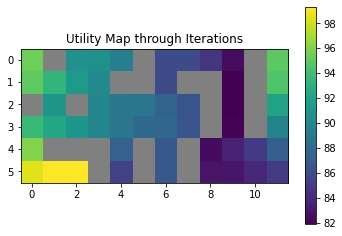

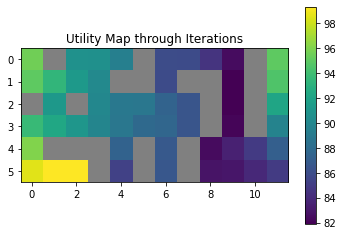

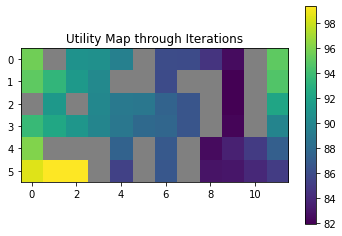

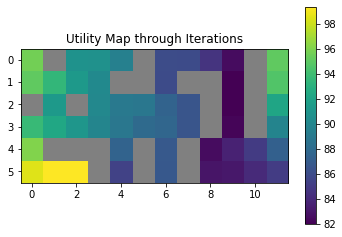

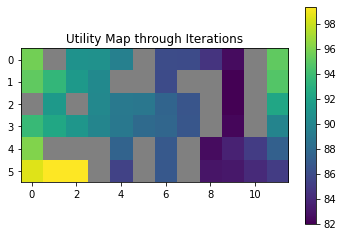

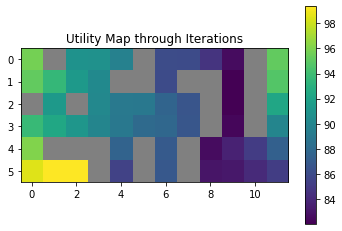

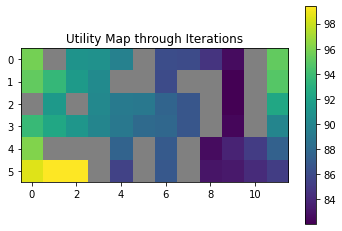

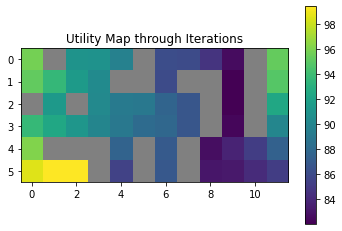

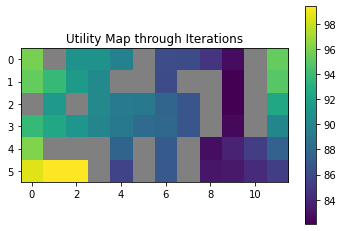

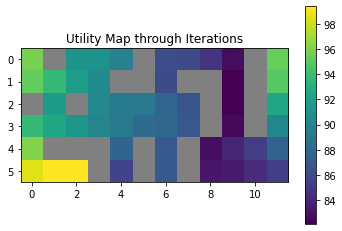

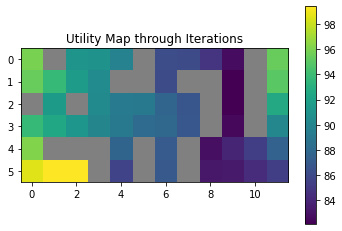

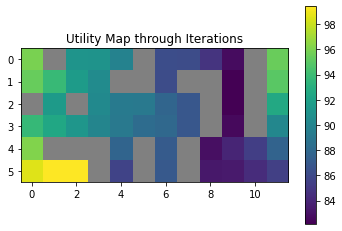

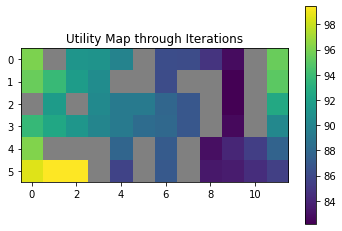

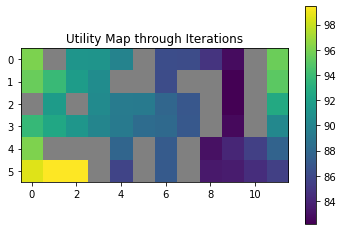

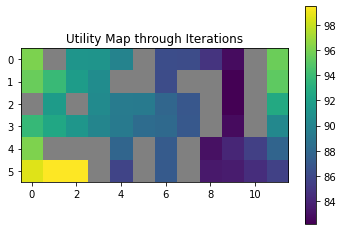

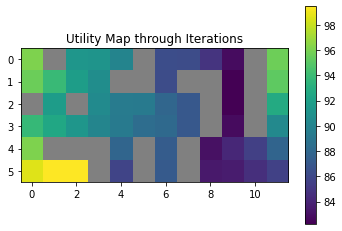

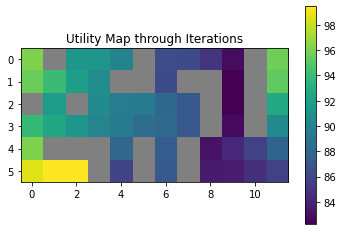

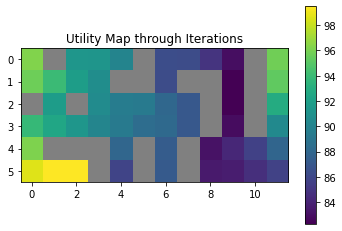

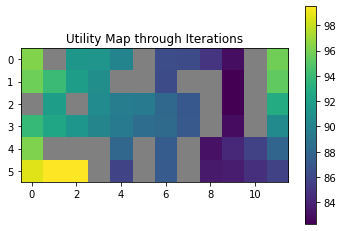

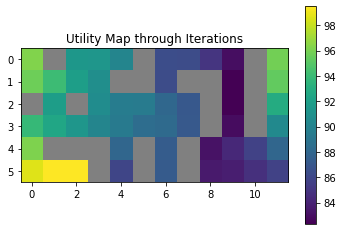

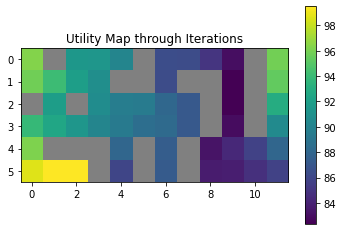

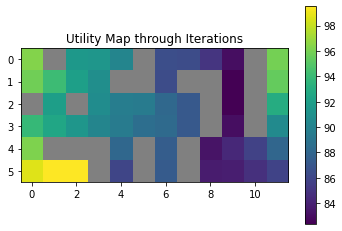

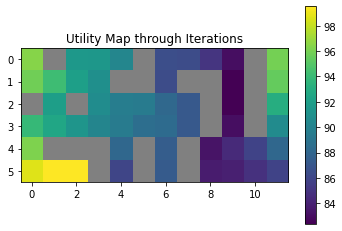

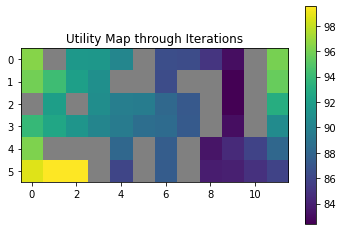

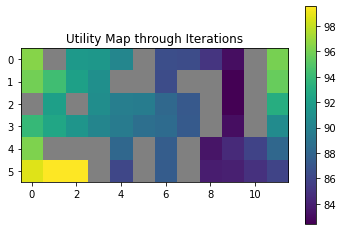

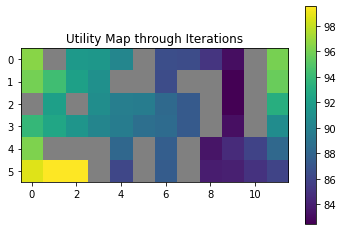

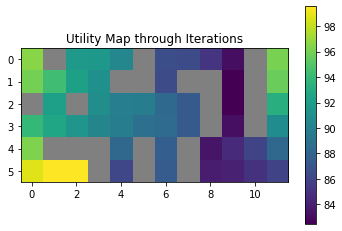

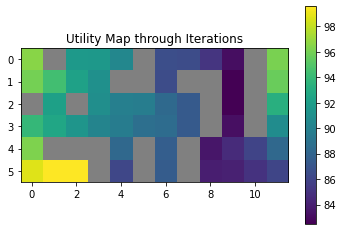

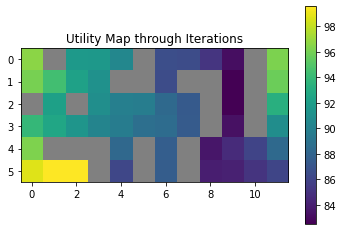

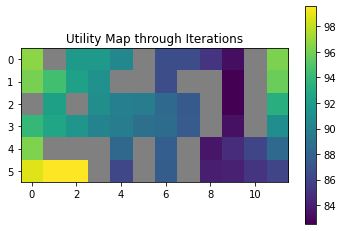

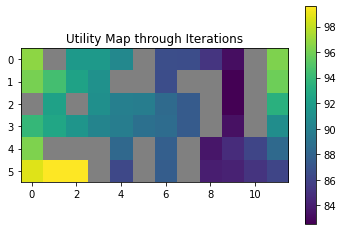

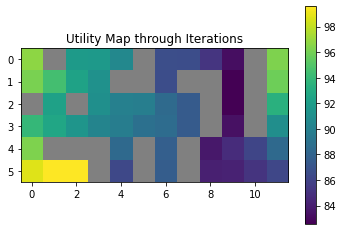

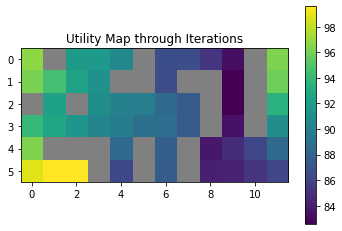

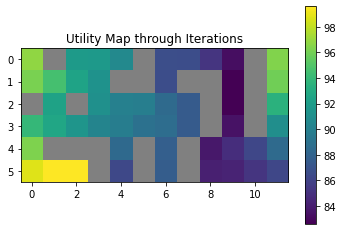

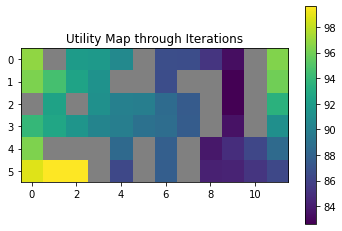

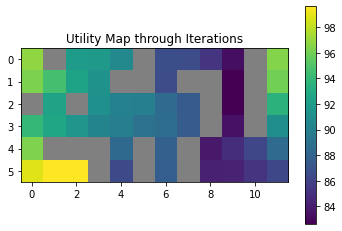

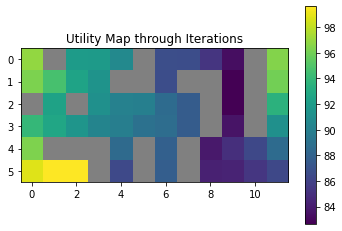

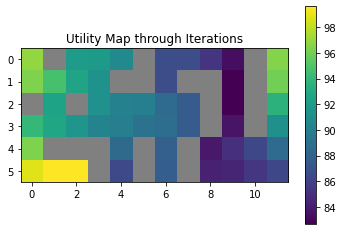

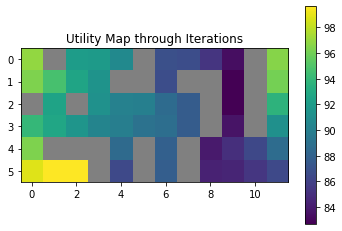

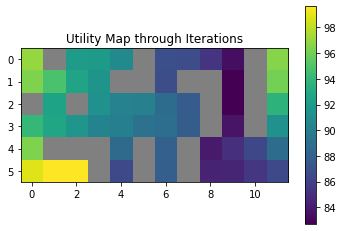

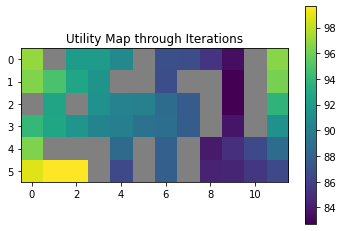

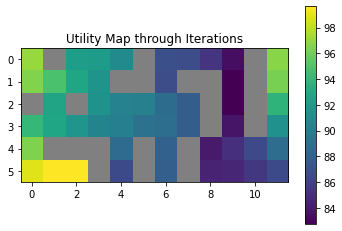

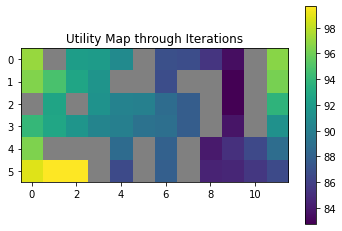

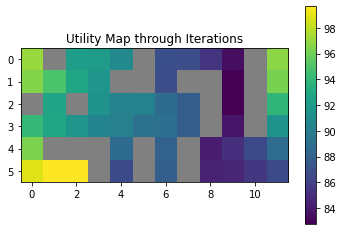

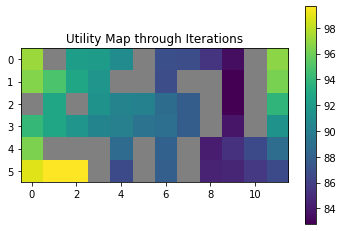

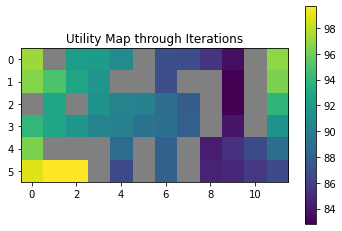

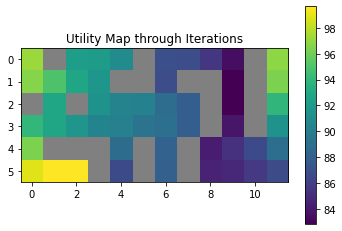

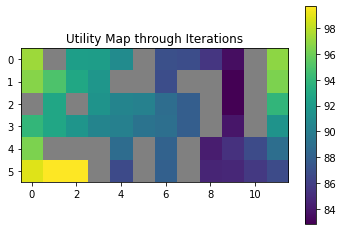

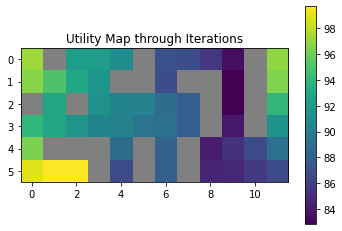

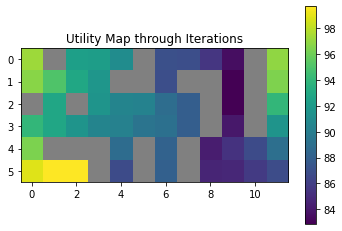

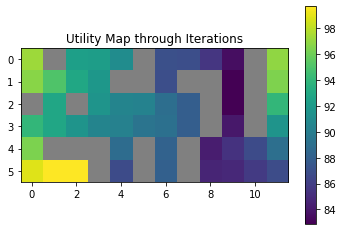

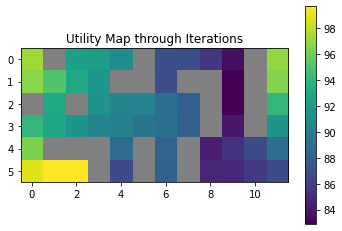

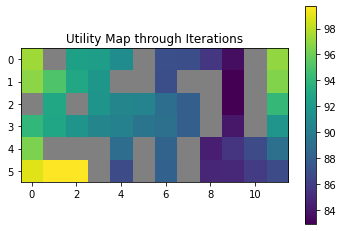

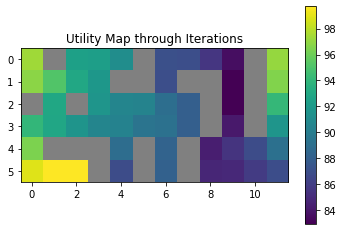

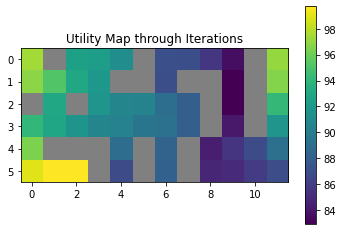

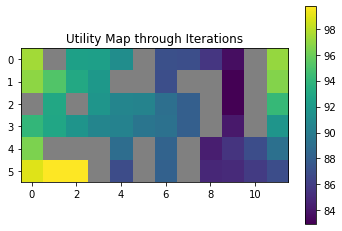

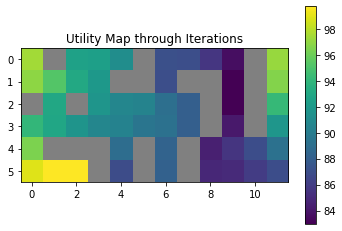

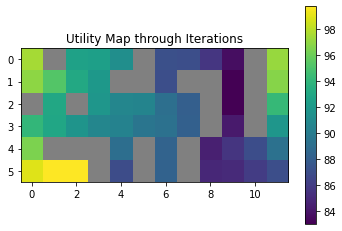

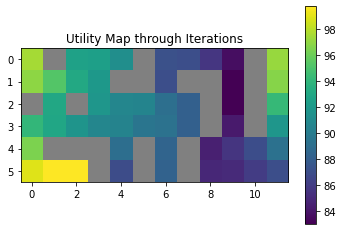

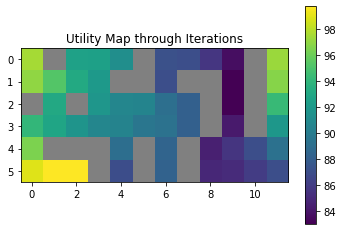

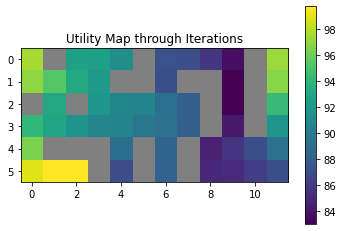

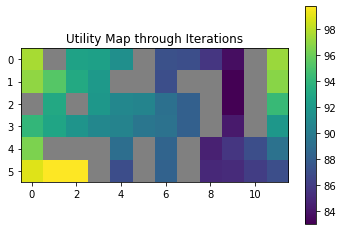

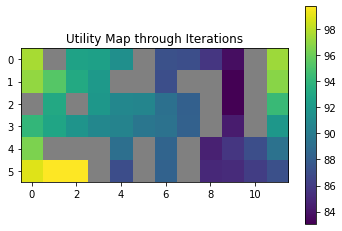

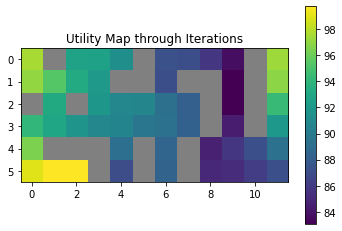

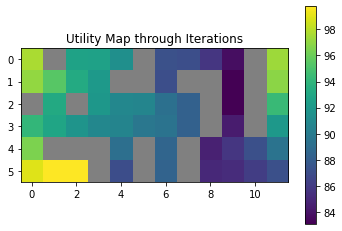

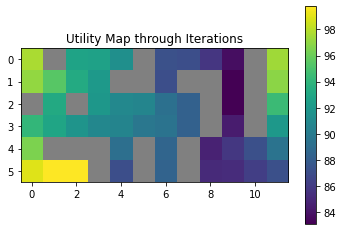

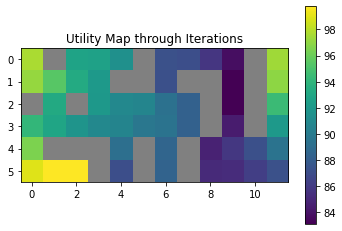

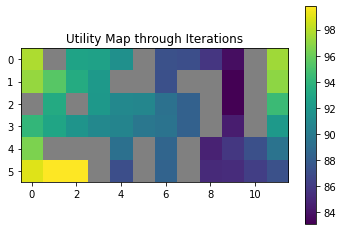

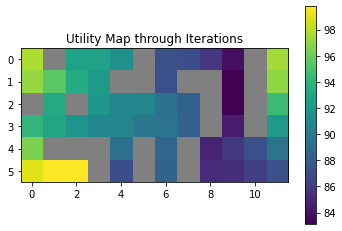

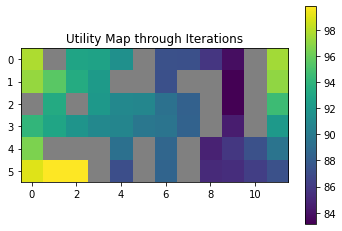

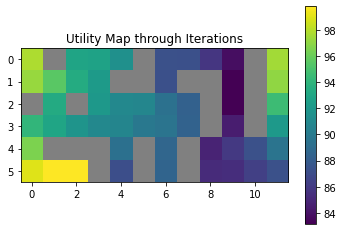

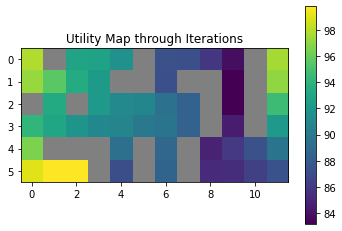

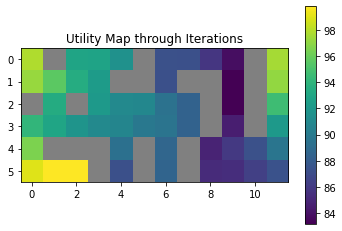

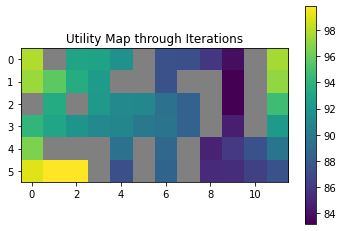

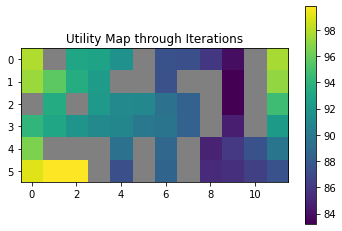

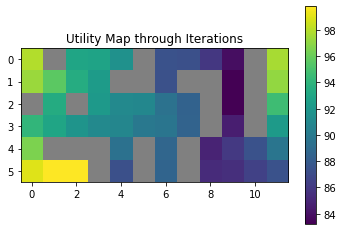

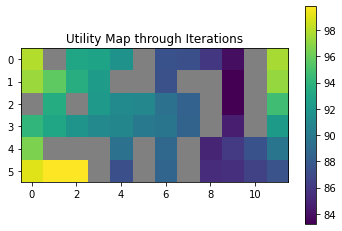

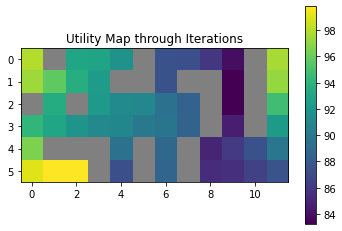

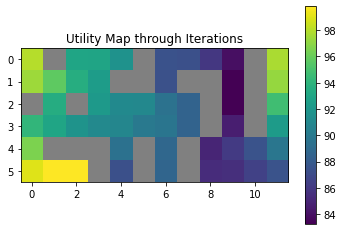

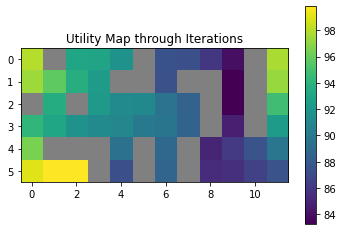

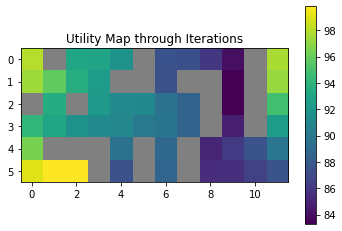

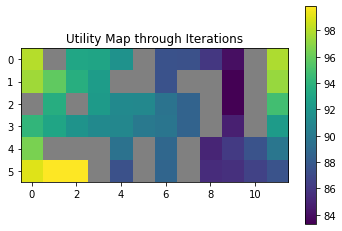

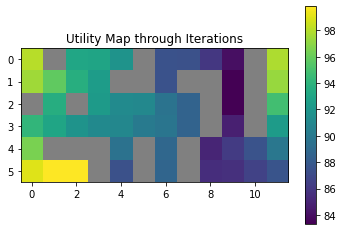

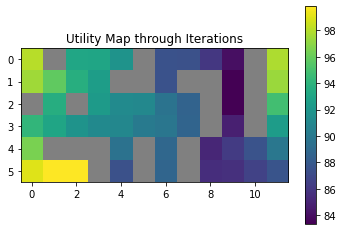

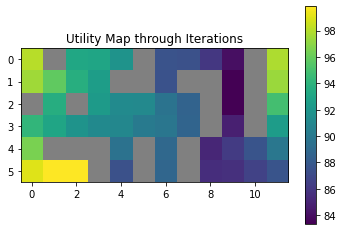

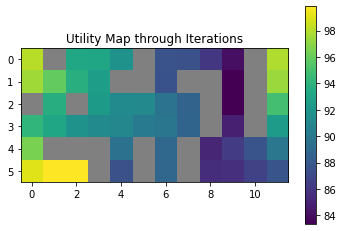

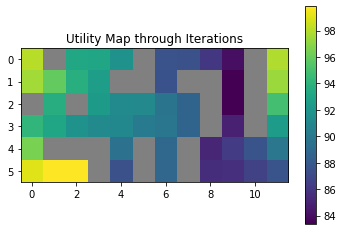

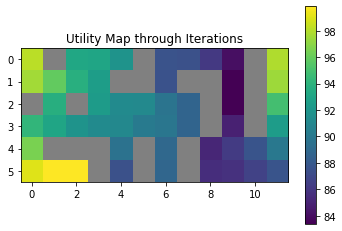

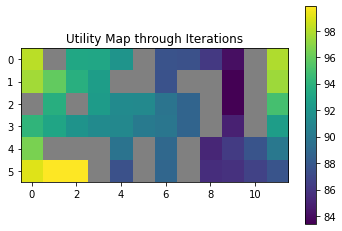

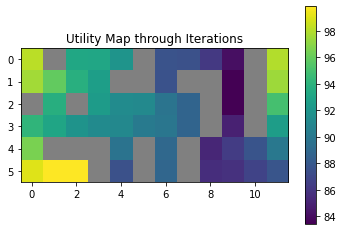

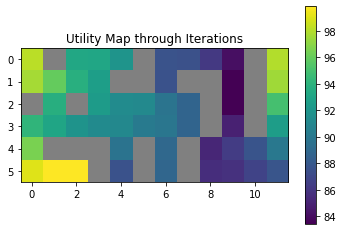

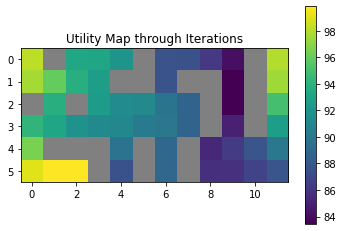

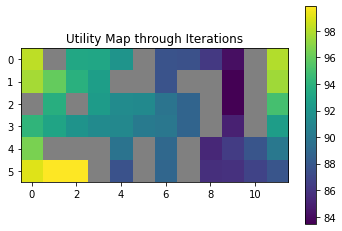

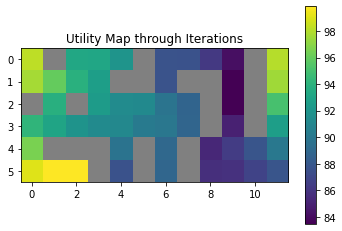

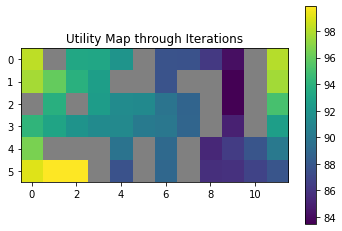

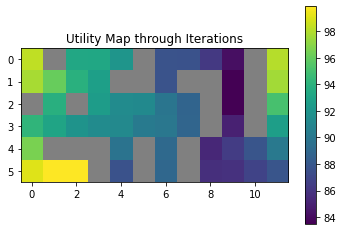

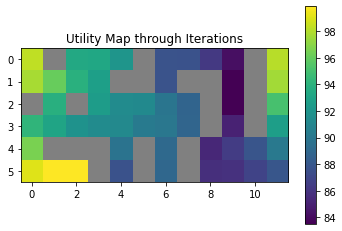

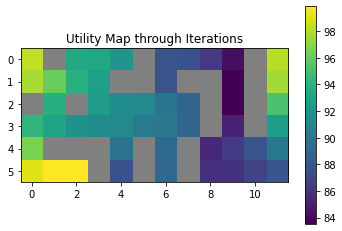

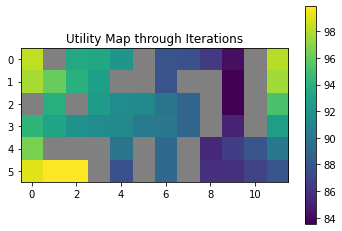

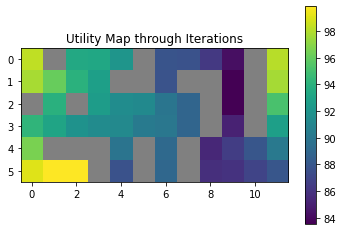

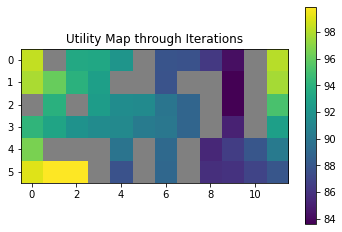

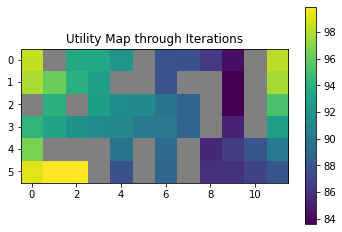

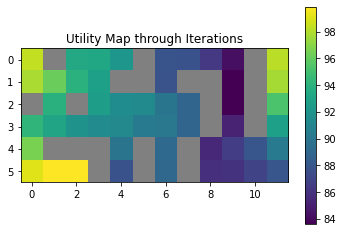

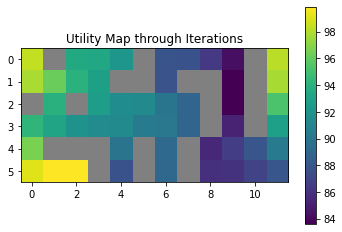

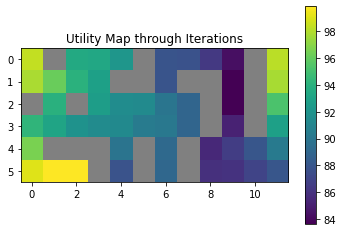

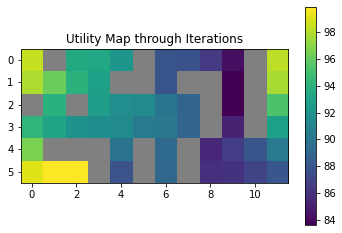

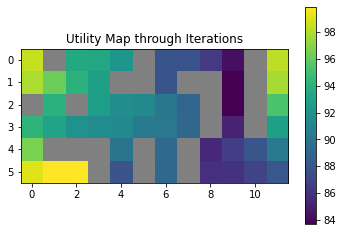

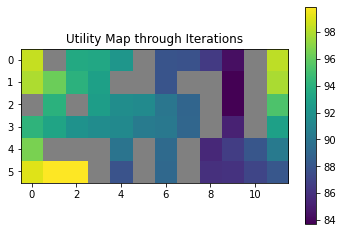

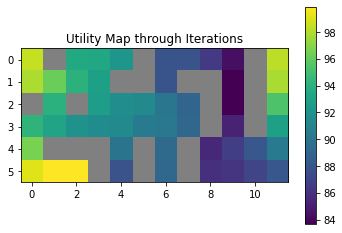

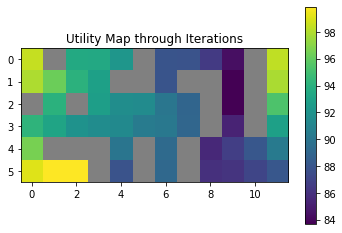

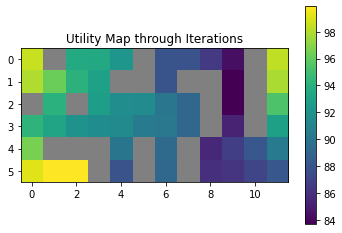

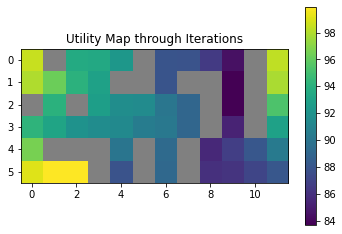

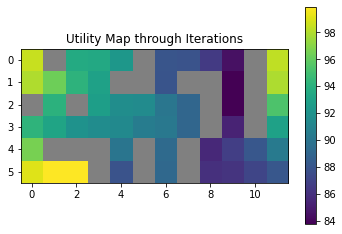

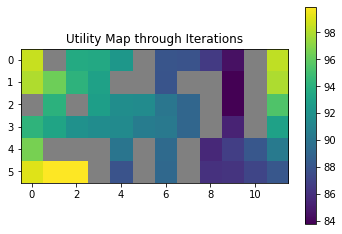

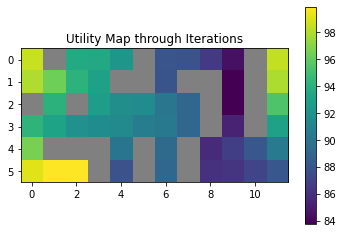

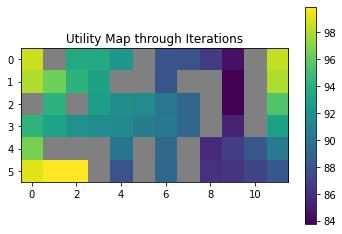

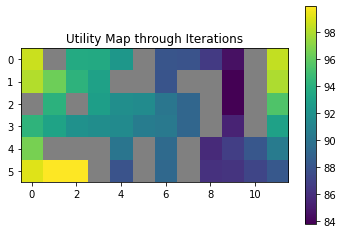

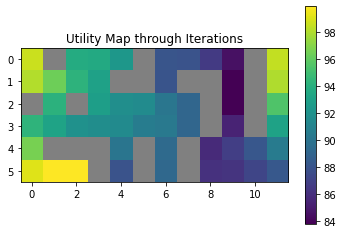

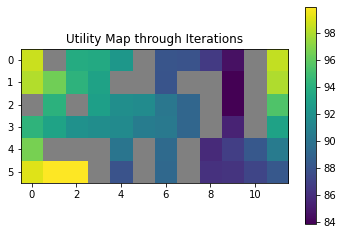

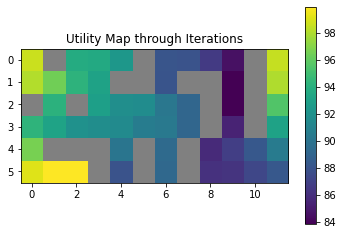

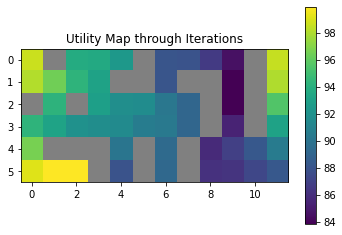

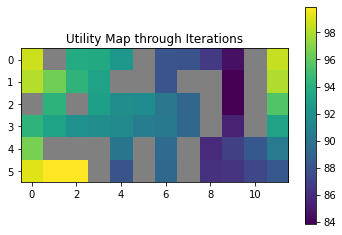

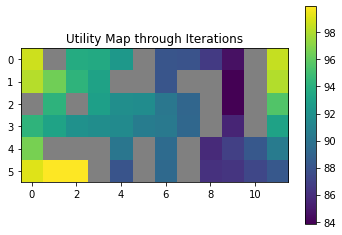

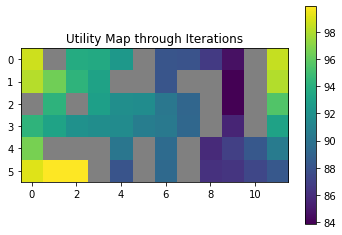

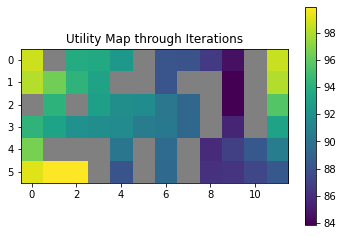

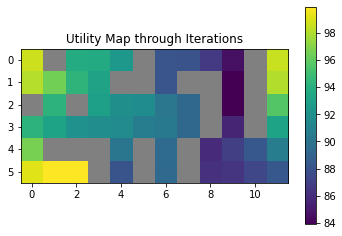

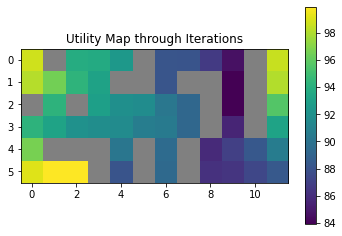

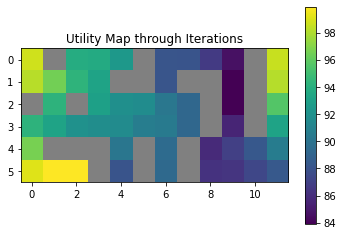

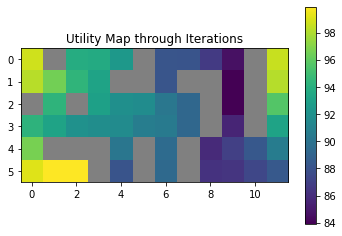

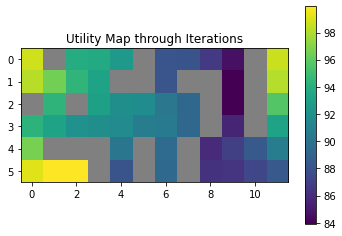

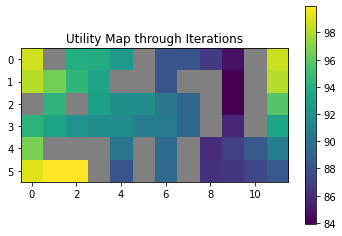

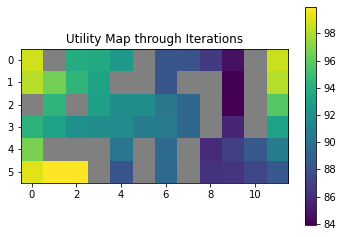

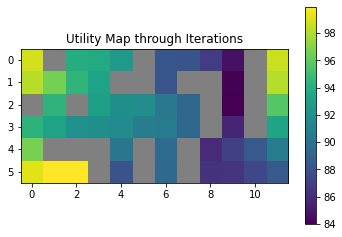

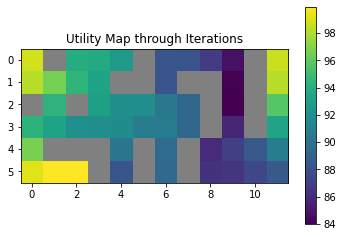

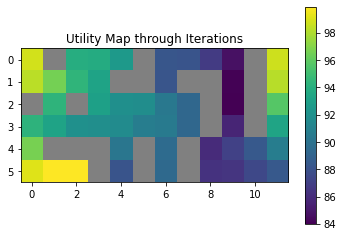

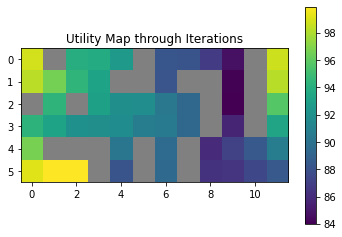

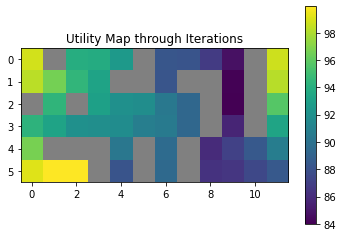

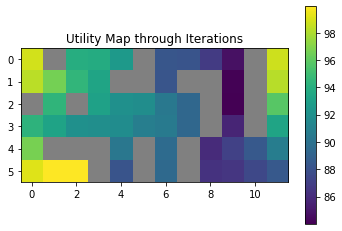

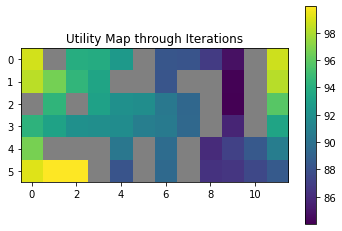

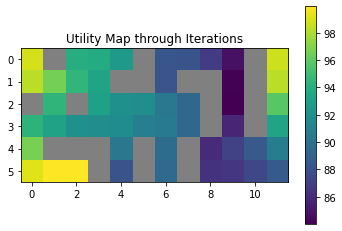

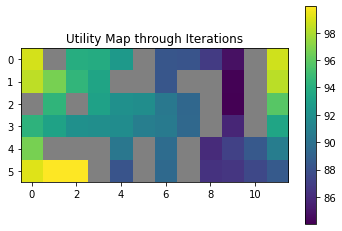

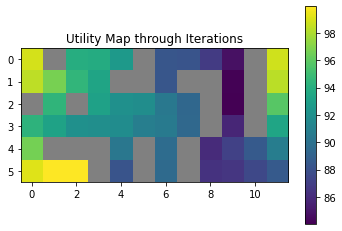

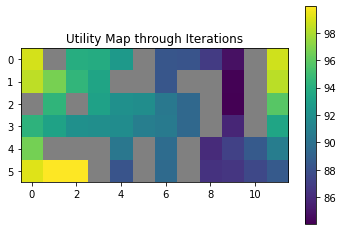

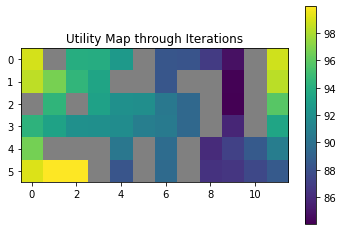

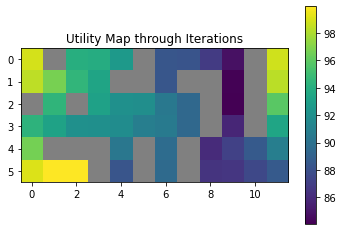

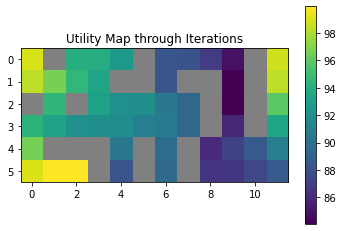

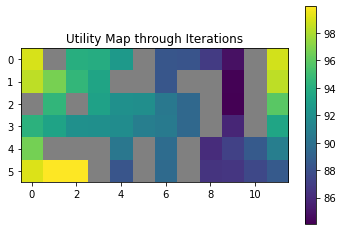

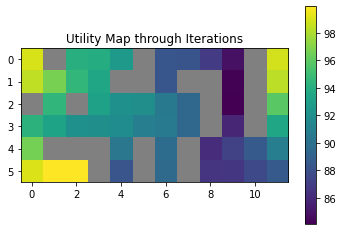

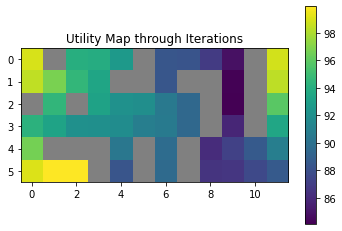

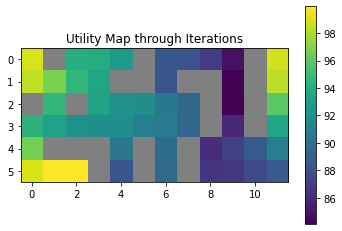

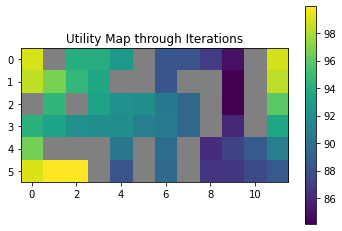

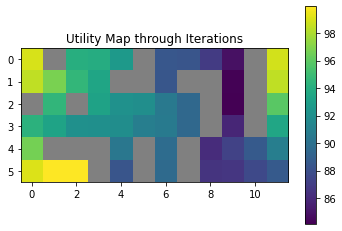

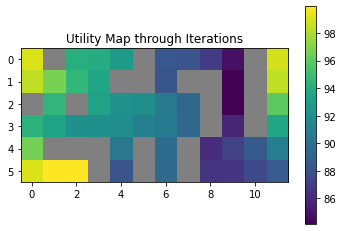

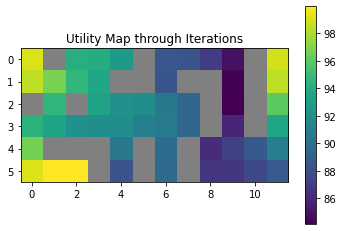

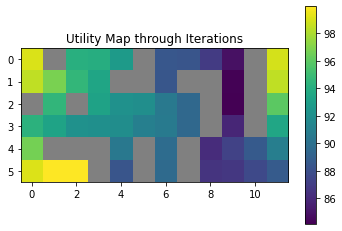

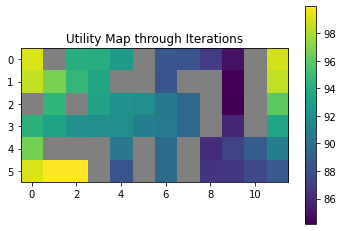

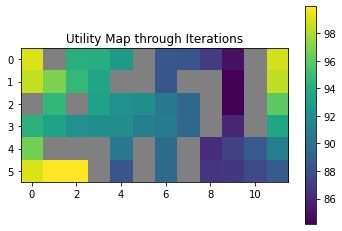

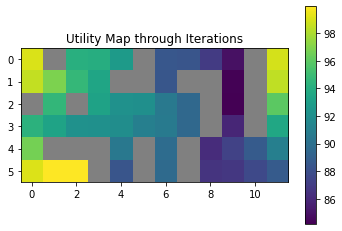

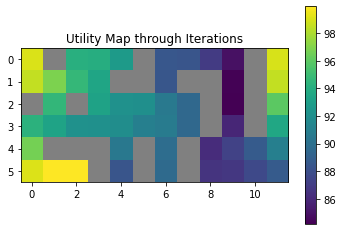

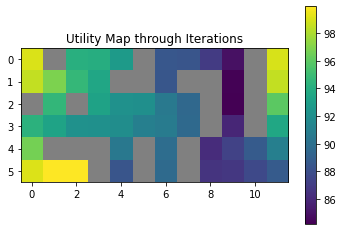

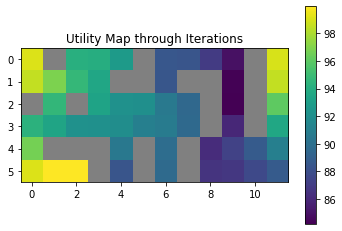

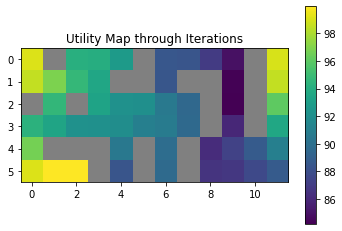

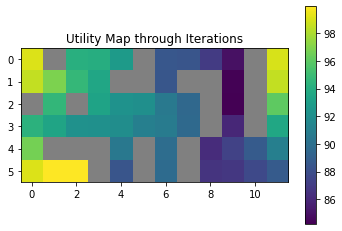

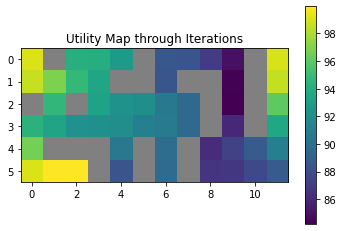

The number of iteration is: 460


In [3]:
#maximum error variable
ERROR = 1
count = 0 
iteration_till_convergence = 0
while ERROR > THETA:
#for i in range(30):
    ERROR = 0
    for row in range(6):
        for column in range(12):
            max_value = float('-inf')
            old_v = get_value([row,column],state_value)

            #find best action
            for a in action:
                new_value = value_of_action([row,column],a,map)
                max_value = max(new_value, max_value)

            #update state_value
            state_value[row][column] = max_value
            ERROR = max(ERROR,abs(old_v-max_value))
    iteration_till_convergence+=1
    display_2d_list_with_highlight(state_value, get_wall_list(map))

print('The number of iteration is:',iteration_till_convergence)

In [4]:
for row in range(6):
    for column in range(12):
        max_value= float('-inf')
        for a in action:
            a_value = value_of_action([row,column],a,map)
            if a_value >= max_value:
                max_value = a_value
                new_action = a
        policy_table[row][column] = new_action

print_policy(policy_table,get_wall_list(map))

Up	Wall	Left	Left	Left	Wall	Left	Left	Left	Left	Wall	Up	
Up	Left	Left	Left	Wall	Wall	Down	Wall	Wall	Left	Wall	Up	
Wall	Up	Wall	Up	Left	Left	Left	Up	Wall	Up	Wall	Up	
Down	Up	Left	Up	Up	Left	Left	Left	Wall	Down	Wall	Up	
Down	Wall	Wall	Wall	Up	Wall	Up	Wall	Right	Right	Right	Up	
Right	Right	Right	Wall	Up	Wall	Up	Wall	Right	Right	Up	Up	


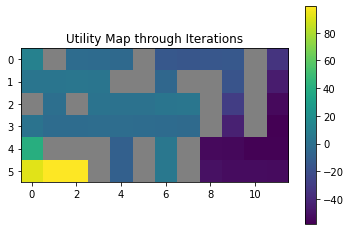

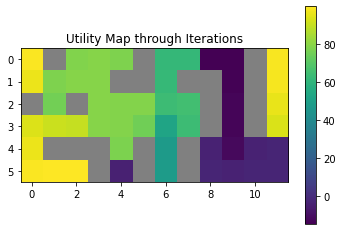

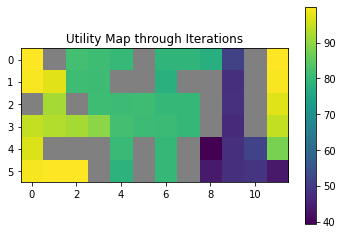

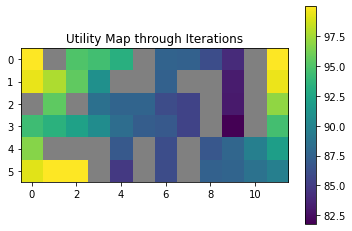

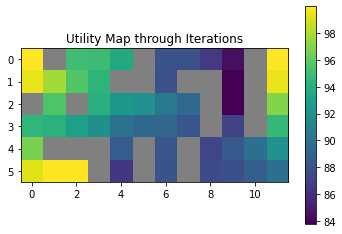

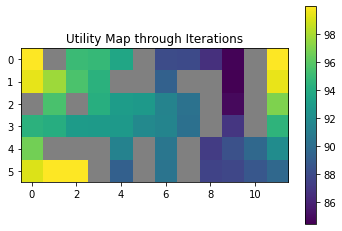

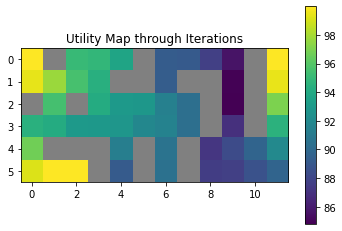

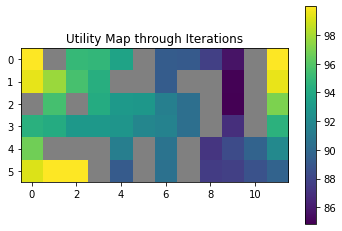

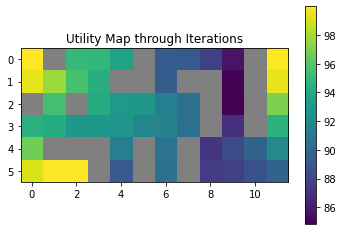

The number of iteration is: 9
1615


In [5]:
#re-initialize_state_value table
state_value = [[0]*12 for i in range(6)]

#re-initialize policy table
policy_table = [[[0,1] for k in range(12)] for j in range(6)]

policy_stable_flag = False
iteration_till_convergence=0
state_sweep_count=0
while not policy_stable_flag:
    #maximum error variable
    ERROR = 1
    while ERROR > THETA:
    #for i in range(30):
        ERROR = 0
        for row in range(6):
            for column in range(12):

                old_v = get_value([row,column],state_value)

                #update state_value

                state_value[row][column] = value_of_action([row,column],policy_table[row][column],map)

                ERROR = max(ERROR,abs(old_v - state_value[row][column]))
        state_sweep_count+=1

    #policy improvement
    policy_stable_flag = True
    for row in range(6):
        for column in range(12):
            old_action = policy_table[row][column]
            max_value= float('-inf')
            for a in action:
                a_value = value_of_action([row,column],a,map)
                if a_value >= max_value:
                    max_value = a_value
                    new_action = a
            policy_table[row][column] = new_action
            if old_action != new_action:
                policy_stable_flag = False
    iteration_till_convergence+=1
    display_2d_list_with_highlight(state_value, get_wall_list(map))
    
print('The number of iteration is:',iteration_till_convergence)
print(state_sweep_count)

In [6]:
print_policy(policy_table,get_wall_list(map))

Up	Wall	Left	Left	Left	Wall	Left	Left	Left	Left	Wall	Up	
Up	Left	Left	Left	Wall	Wall	Down	Wall	Wall	Left	Wall	Up	
Wall	Up	Wall	Up	Left	Left	Left	Up	Wall	Up	Wall	Up	
Down	Up	Left	Up	Up	Left	Left	Left	Wall	Down	Wall	Up	
Down	Wall	Wall	Wall	Up	Wall	Up	Wall	Right	Right	Right	Up	
Right	Right	Right	Wall	Up	Wall	Up	Wall	Right	Right	Up	Up	


# Comments

## For Value Iteration:
 +The number of iterations needed to reach convergence is the same , 460.

## For Policy Iteration:
 +The number of iterations needed to reach convergence increased from 8 to 9. 
 +The number of state space sweeps needed increase from 826 to 1615.

## The Convergence Certainty:
 ### Regardless of the environment's complexity, both algorithms are guanranteed to converge.
 ### Value Iteration's accuracy is only limit by the accuracy threshold THETA.
 ### Policy Iteration's accuracy is also limited by the accuracy threshold THETA, as an erroneous Value Table will give incorrect optimal actions.